<a href="https://colab.research.google.com/github/CarolinaPiedrahita/fundamentos_IA/blob/main/Piedrahita_Carolina_Script_Semana6__Estad%C3%ADstica_Inferencial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset: Completamiento y producción








**Título del Trabajo:** Uso de librerías Python para IA con Datos de Producción y Completamiento en Python

**Nombre Completo:** Carolina Piedrahita

**Curso:** Fundamentos para IA NRC-405

**Número de Semana:** Semana 4

**Nombre del Docente:** ROY DIAZ VESGA

**Fecha de Entrega:** 10 Junio 2024


## 0.- Importación de librerías


In [3]:
import pandas as pd  # Manejo de data estructurada (Dataframe)
import numpy as np  # Manejo de matrices
import matplotlib.pyplot as plt  # Gráficas
import seaborn as sns  # Gráficas sencillas
from scipy import stats  # Operaciones estadísticas
from PIL import Image  # Manipulación de imágenes
import cv2  # Lectura de
import folium
from IPython.display import display, IFrame
from math import pi

Funciones que utilizaré para visualizar y resumir variables numéricas y categóricas.

In [4]:
def analisisNumericas(df, variable):
  # fig, ax = plt.subplots(1, 2,figsize=(12, 4))
  # ax[0].hist(df[variable], bins=25)
  # ax[1].boxplot(df[variable],0, 'gD')
  # plt.show()

  print(" "*20,"Histograma"," "*20)
  df[variable].plot.hist(bins=25,figsize=(8,4),color="#CABDE9")
  plt.show()
  print("\n")
  print(" "*20,"Boxplot"," "*20)
  df[variable].plot.box(figsize=(8,4))
  plt.show()

def analisisCategoricas(df, variable):
  frecuencia_absoluta = pd.DataFrame(df[variable].astype('str').fillna('Nulo').value_counts(dropna = False))
  frecuencia_absoluta.columns = ['FREC_ABS']
  frecuencia_relativa = pd.DataFrame(df[variable].astype('str').fillna('Nulo').value_counts(normalize = True, dropna = False))
  frecuencia_relativa.columns = ['FREC_REL']
  tablaResumen = pd.concat([frecuencia_absoluta,frecuencia_relativa], axis = 1)
  display(tablaResumen)
  tablaResumen
  plt.bar(x = tablaResumen.index, height = tablaResumen['FREC_ABS'], color="#CABDE9")
  for i, txt in enumerate(tablaResumen['FREC_ABS']):
    plt.annotate(str(txt), (i, txt), fontsize = 12)
  plt.twinx()
  plt.plot(tablaResumen['FREC_REL'], linestyle='-', linewidth=2.0, color='red')
  plt.ylim(0, 1)
  for i, txt in enumerate(tablaResumen['FREC_REL']):
    plt.annotate(str(round(txt * 100, 1)) + '%', (i, txt), fontsize = 12, ha='center')
  plt.show()

## 1. Comprensión del negocio

Una empresa operadora de un campo africano desea a través de un estudio responder a las siguientes preguntas:

*   ¿Cuál es el completamiento que dá tasas más altas de producción?
*   ¿Cuál es el completamiento que dá tasas más bajas de producción?
*   ¿Cuál es el completamiento que dá tasas más altas de inyección?
*   ¿Cuál es el completamiento que dá tasas más bajas de inyección?




## 2. Comprensión de los datos & Carga de Dataset

**En esta etapa nos avocaremos a conocer todo lo referente a los datos con los que contamos**

Quise usar este dataset dado que mi profesión de base es ingenieria de petroleos. El dataset hace parte de una base de datos que se me compartieron durante mi pansantía en el laboratorio de geomecanica aplicada de la universidad Nacional.

Las características  son:

*   Qo: Caudal oil
*   Qw: Caudal agua
*   Qg: Caudal de gas
*   Year: Año
*   Month: Mes
*   wellAPI: API del pozo
*   Wellname: Nombre del pozo
*   BHP: Presión de fondo
*   CompL: Completamiento
*   FlowDays: Días de flujo
*   Type: Tipo
*   TD: Profundidad verdadera
*   reservoir: yacimiento
*   long: longitud
*   lat: latitud










### 2.1.- Recopilación de los Datos


In [5]:
# Lectura de la base de datos desde Github en internet y asignación a la variable df.
path = "https://raw.githubusercontent.com/CarolinaPiedrahita/DataScienceOilandGas/main/DatasetCompletamientoProducer.csv"
df = pd.read_csv(path)


In [6]:
# Visualizar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())

Primeras filas del dataset:
   Year  Month     wellAPI Wellname  BHP        Qo         Qw        Qg  \
0  2005      1  2ECFC837AC  Well025   15  33.30351  363.87170  13.85077   
1  2005      2  2ECFC837AC  Well025   15  27.24609  378.91081  14.23028   
2  2005      3  2ECFC837AC  Well025   15  22.95982  385.97324  13.93621   
3  2005      8  2ECFC837AC  Well025   15  25.33575  395.48484  13.87802   
4  2005      9  2ECFC837AC  Well025   15  25.15923  383.04923  14.12587   

      CompL  FlowDays      Type        TD reservoir       long        lat  
0  60.69554  29.99997  Producer  7509.843    Bisque  21.204409 -33.169318  
1  60.69554  28.00000  Producer  7509.843    Bisque  21.204409 -33.169318  
2  60.69554  31.00000  Producer  7509.843    Bisque  21.204409 -33.169318  
3  60.69554  29.99997  Producer  7509.843    Bisque  21.204409 -33.169318  
4  60.69554  30.00000  Producer  7509.843    Bisque  21.204409 -33.169318  


In [7]:
df.shape
# INTERPRETACION:
# 3220 observaciones | registros o filas
# 15 columnas

(3220, 15)

In [8]:
df.info() #Acá podemos observar el tipo de dato y la cantidad de registros asociados a cada variable.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       3220 non-null   int64  
 1   Month      3220 non-null   int64  
 2   wellAPI    3220 non-null   object 
 3   Wellname   3220 non-null   object 
 4   BHP        3220 non-null   int64  
 5   Qo         3220 non-null   float64
 6   Qw         3220 non-null   float64
 7   Qg         3220 non-null   float64
 8   CompL      3220 non-null   float64
 9   FlowDays   3220 non-null   float64
 10  Type       3220 non-null   object 
 11  TD         3220 non-null   float64
 12  reservoir  3220 non-null   object 
 13  long       3220 non-null   float64
 14  lat        3220 non-null   float64
dtypes: float64(8), int64(3), object(4)
memory usage: 377.5+ KB


In [9]:
df.head() # Acá podemos visualizar como esta formado nuestro dataset, y ejemplo de los primeros 10 datos que lo conforman.

,Year,Month,wellAPI,Wellname,BHP,Qo,Qw,Qg,CompL,FlowDays,Type,TD,reservoir,long,lat
0,2005,1,2ECFC837AC,Well025,15,33.30351,363.87170,13.85077,60.69554,29.99997,Producer,7509.843,Bisque,21.204409,-33.169318
1,2005,2,2ECFC837AC,Well025,15,27.24609,378.91081,14.23028,60.69554,28.00000,Producer,7509.843,Bisque,21.204409,-33.169318
2,2005,3,2ECFC837AC,Well025,15,22.95982,385.97324,13.93621,60.69554,31.00000,Producer,7509.843,Bisque,21.204409,-33.169318
3,2005,8,2ECFC837AC,Well025,15,25.33575,395.48484,13.87802,60.69554,29.99997,Producer,7509.843,Bisque,21.204409,-33.169318
4,2005,9,2ECFC837AC,Well025,15,25.15923,383.04923,14.12587,60.69554,30.00000,Producer,7509.843,Bisque,21.204409,-33.169318


In [10]:
# Descripción estadística del dataset
print("Descripción estadística del dataset:")
print(df.describe())

Descripción estadística del dataset:
              Year        Month     BHP           Qo           Qw  \
count  3220.000000  3220.000000  3220.0  3220.000000  3220.000000   
mean   2011.286646     6.459317    15.0    31.563597   631.741510   
std       3.760557     3.471701     0.0    20.365526   374.591027   
min    2005.000000     1.000000    15.0     0.582310     7.001600   
25%    2008.000000     3.000000    15.0    19.297650   376.534282   
50%    2011.000000     6.000000    15.0    25.377850   562.762825   
75%    2014.000000    10.000000    15.0    36.573622   809.403585   
max    2018.000000    12.000000    15.0   249.002960  2230.359120   

                Qg        CompL     FlowDays            TD         long  \
count  3220.000000  3220.000000  3220.000000   3220.000000  3220.000000   
mean     14.047146    87.794252    29.587879   7878.237043    21.218957   
std       8.133956    53.194094     2.187269    515.709144     0.015996   
min       0.330820    11.482940     2.000

In [11]:
target = 'Qo' # sera el target dado que se vamos a  modelar con pozos productores

In [12]:
df[target].value_counts() #Se realiza un conteo por tipo de tasa de producción de petróleo


Qo
27.67515    8
25.15923    6
20.75636    5
29.56209    5
22.01432    5
           ..
30.42846    1
29.80963    1
25.37633    1
30.03173    1
18.45551    1
Name: count, Length: 3056, dtype: int64

In [13]:
df['reservoir'].value_counts()
#Se realiza un conteo por tipo de yacimiento


reservoir
Red       1922
Maine      742
Rock       295
Bisque     261
Name: count, dtype: int64

In [14]:
df['CompL'].value_counts() #Se realiza un conteo por completamiento

CompL
68.89764     154
24.60630     141
60.69554     135
187.00788    121
78.74016     115
            ... 
58.07769       1
64.75689       1
95.80735       1
111.16065      1
53.54903       1
Name: count, Length: 70, dtype: int64

### 2.2 Identificación y conteo de valores faltantes:

Voy aplicar el método `isnull()` y a utilizar la función de agregación `sum()` para identificar los valores faltantes por variable.

In [15]:
# Identificaciónde valores faltantes
datos_faltantes = df.isnull().sum()
datos_faltantes

Year         0
Month        0
wellAPI      0
Wellname     0
BHP          0
Qo           0
Qw           0
Qg           0
CompL        0
FlowDays     0
Type         0
TD           0
reservoir    0
long         0
lat          0
dtype: int64

De acuerdo a la información anterior no tenemos datos faltantes para ningún campo.


Por lo cuál, no es necesario hacer tratamiento de datos faltantes, para fines académicos se listan las opciones de tratamiento de datos faltantes:

<ol>
    <li>Eliminar el dato entero<br>
        a. Eliminar la fila entera<br>
        b. Eliminar la columna entera
    </li>
    <li>Reemplazar el dato<br>
        a. Reemplazar por la media<br>
        b. Reemplazar por la moda<br>
        c. Reemplazar basados en otra función
    </li>
</ol>

En este caso tenemos cierta libertad para aplicar diferences métodos de llenado de datos faltantes; no obstante, algunos métodos pueden resultar más adecuados que otros depende del caso. Ejemplo:

Teniendo en cuenta las buenas práctias sólo debemos eliminar una columna sí la mayoría de entradas son vacías. En nuestro caso, ninguna de las columnas cumplen con este criterio como para ser eliminadas.



In [16]:
#aparencia de la tabla luego de procesarla
df.head()

,Year,Month,wellAPI,Wellname,BHP,Qo,Qw,Qg,CompL,FlowDays,Type,TD,reservoir,long,lat
0,2005,1,2ECFC837AC,Well025,15,33.30351,363.87170,13.85077,60.69554,29.99997,Producer,7509.843,Bisque,21.204409,-33.169318
1,2005,2,2ECFC837AC,Well025,15,27.24609,378.91081,14.23028,60.69554,28.00000,Producer,7509.843,Bisque,21.204409,-33.169318
2,2005,3,2ECFC837AC,Well025,15,22.95982,385.97324,13.93621,60.69554,31.00000,Producer,7509.843,Bisque,21.204409,-33.169318
3,2005,8,2ECFC837AC,Well025,15,25.33575,395.48484,13.87802,60.69554,29.99997,Producer,7509.843,Bisque,21.204409,-33.169318
4,2005,9,2ECFC837AC,Well025,15,25.15923,383.04923,14.12587,60.69554,30.00000,Producer,7509.843,Bisque,21.204409,-33.169318


### 2.3 Corrección de datos

<p>Cómo un último paso en el preprocesado de los datos, se pasa a  revisar de que todos los datos estén en el formato adecuado(int, float, text u otro).</p>

Podemos usar en Pandas
<p><b>.dtypes()</b>  para ver el tipo</p>
<p><b>.astype()</b> para cambiar el tipo</p>

In [ ]:
df.dtypes

Year           int64
Month          int64
wellAPI       object
Wellname      object
BHP            int64
Qo           float64
Qw           float64
Qg           float64
CompL        float64
FlowDays     float64
Type          object
TD           float64
reservoir     object
long         float64
lat          float64
dtype: object

En mi  caso  particular voy a definir las variables categóricas como "string" (o cadena de caracteres es un tipo de dato que se utiliza para almacenar textos).

In [17]:
df[["wellAPI"]] = df[["wellAPI"]].astype("str")
df[["Wellname"]] = df[["Wellname"]].astype("str")
df[["Type"]] = df[["Type"]].astype("str")
df[["reservoir"]] = df[["reservoir"]].astype("str")
df[["Year"]] = df[["Year"]].astype("str")
df[["Month"]] = df[["Month"]].astype("str")

In [18]:
df.dtypes

Year          object
Month         object
wellAPI       object
Wellname      object
BHP            int64
Qo           float64
Qw           float64
Qg           float64
CompL        float64
FlowDays     float64
Type          object
TD           float64
reservoir     object
long         float64
lat          float64
dtype: object

Se puede observar que todas las columnas tienen el tipo correcto.



### 2.4 Exploración de los Datos

El análisis exploratorio de datos (EDA del inglés Exploratory Data Analysis) se realiza con el fin de:

<ol>
  <li>Resumir las principales características del conjunto de datos.</li>
  <li>Entender mejor el conjunto de datos que se está tratando.</li>
  <li>Establecer relaciones entre variables.</li>
  <li>Extraer las variables más importantes.</li>
</ol>

**Objetivo:** Determinar las características que más impactan en el valor de la tasa de producción para el caso de estudio.

Para abordar el análisis exploratorio de datos, aplicaré las siguientes técnicas:

<ol>
  <li> Estadística descriptiva</li>
  <li> Agrupamiento de datos</li>  
  <li> Correlación (Mapas de correlación)</li>
</ol>



Procedo a realizar  una exploración de los datos. La **estadística descriptiva** nos permite explorar los datos con el propósito de hallar las características principales, mediante la implementación de gráficas y el cálculo de algunas variable estadísticas. Para este fín, en Python, podemos hacer uso de:

<ol>
  <li>Métodos: <code>.describe()</code>, el cuál permite obtener un resumen estadístico de las <b>variables numéricas</b> en <code>pandas</code>, o la función <code>.value_counts()</code>, la cual permite contabilizar variables categóricas .</li>
    <li>Box plots. </li>
    <li>Gráficos de dispersión. </li>
</ol>

In [19]:
df.describe() # Descripción estadística de los variables del dataset: desviación estandar (std), minimos y maximos, percentiles 25%, 50%, 75%.

,BHP,Qo,Qw,Qg,CompL,FlowDays,TD,long,lat
count,3220.0,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,15.0,31.563597,631.741510,14.047146,87.794252,29.587879,7878.237043,21.218957,-33.183544
std,0.0,20.365526,374.591027,8.133956,53.194094,2.187269,515.709144,0.015996,0.018255
min,15.0,0.582310,7.001600,0.330820,11.482940,2.000000,6966.864000,21.187852,-33.219936
25%,15.0,19.297650,376.534282,10.580220,53.745950,28.999980,7595.145000,21.204409,-33.199143
50%,15.0,25.377850,562.762825,14.030440,70.538060,30.000000,7777.231000,21.217019,-33.182420
75%,15.0,36.573622,809.403585,14.227677,101.706040,31.000000,8228.347000,21.232345,-33.171683
max,15.0,249.002960,2230.359120,84.755190,209.973760,31.000000,10357.612000,21.247229,-33.137298


###Definición de variables categóricas y númericas.

In [20]:
# Definimos las variables que trataremos como numéricas y como categóricas de nuestro dataset generado
varCategoricas = ['reservoir','Year','Month']
varNumericas = ['Qo', 'Qw','CompL','FlowDays','TD']

#### Sacamos el análisis categórico para cada variable.


-------------------------------------------------- reservoir --------------------------------------------------


,FREC_ABS,FREC_REL
reservoir,,
Red,1922,0.596894
Maine,742,0.230435
Rock,295,0.091615
Bisque,261,0.081056


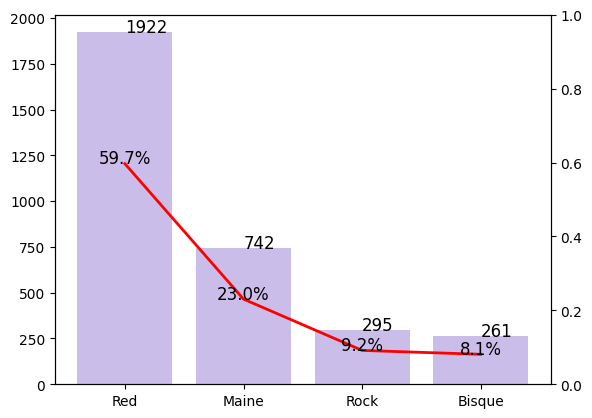




-------------------------------------------------- Year --------------------------------------------------


,FREC_ABS,FREC_REL
Year,,
2009,337,0.104658
2013,333,0.103416
2011,260,0.080745
2014,256,0.079503
2010,252,0.078261
2005,228,0.070807
2008,223,0.069255
2012,219,0.068012
2015,202,0.062733


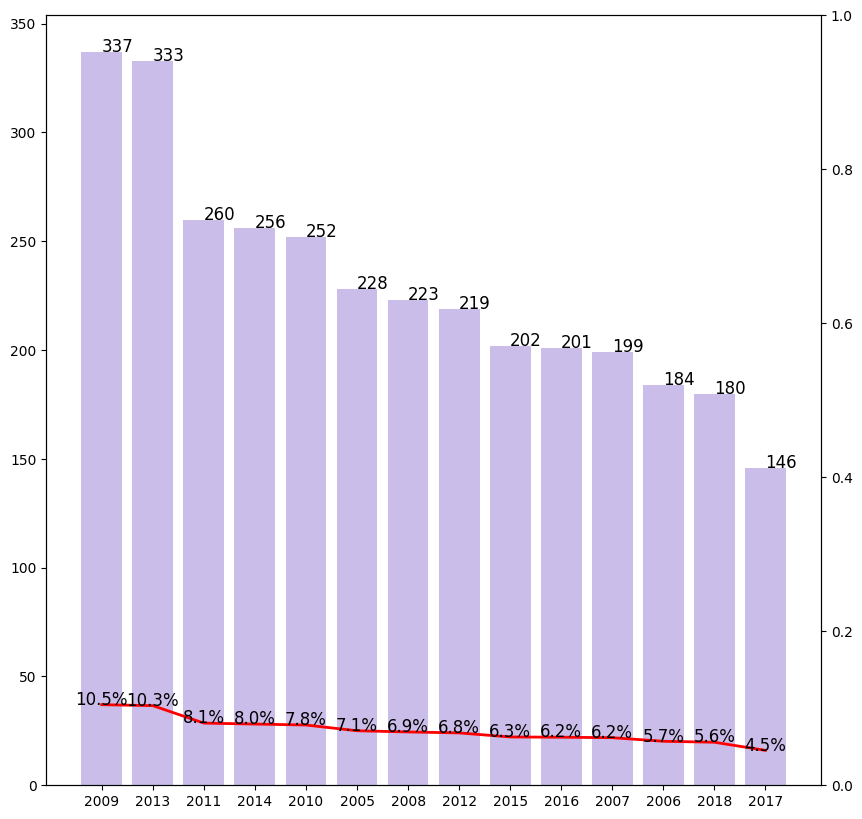




-------------------------------------------------- Month --------------------------------------------------


,FREC_ABS,FREC_REL
Month,,
10,299,0.092857
3,287,0.089130
9,284,0.088199
5,284,0.088199
1,282,0.087578
11,280,0.086957
4,274,0.085093
2,261,0.081056
6,246,0.076398


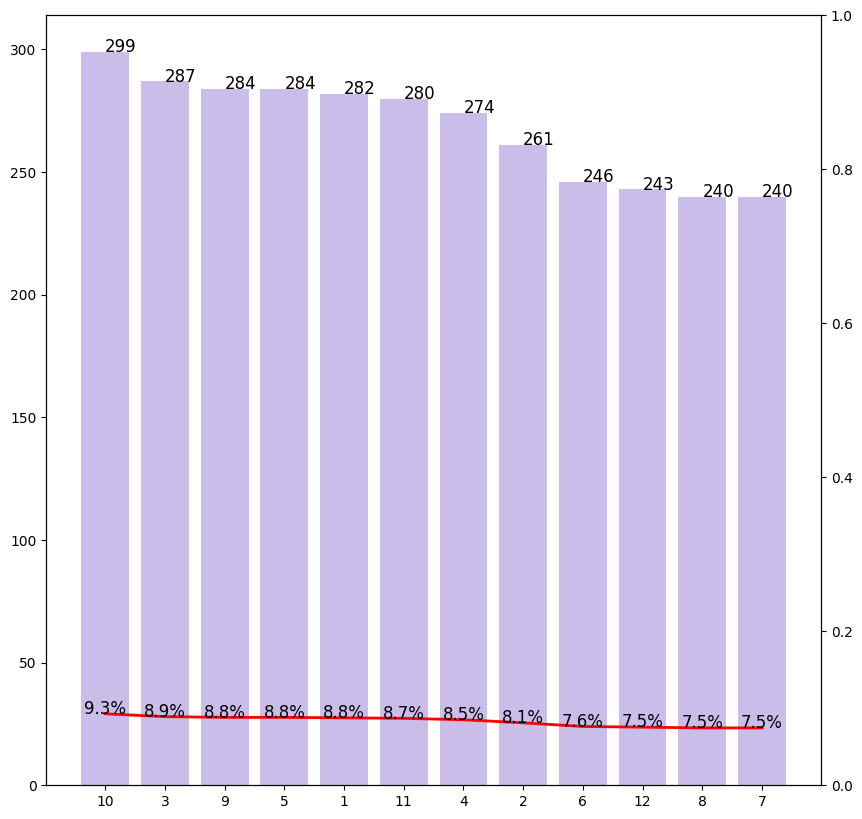

<Figure size 1000x1000 with 0 Axes>

In [21]:
#Sacamos el analisis categorico para cada variable
for categorica in varCategoricas:
    print("-"*50,categorica,"-"*50)
    analisisCategoricas(df, categorica)
    plt.figure(figsize=(10,10))
    print("\n\n")

#### **Interpretación variables categóricas:**
* Se tienen 3220 datos para pozos productores.
* La mayoría de los yacimientos son tipo Red para este dataset se tienen el  59.7% en esta modalidad y el 23% tipo Maine.
* El año en el cuál se tiene más registros es el 2009 y 2013, los meses para los cuáles más registros se reportan en este dataset son Octubre (9.3% de los datos), Marzo (8.9%) y Septiembre (8.8%).

#### Sacamos el análisis númerico para cada variable.

**Interés del box-plot** El máximo interés del box-plot es visualizar la distribución de una variable numérica de la manera más simplificada posible. Sólo utiliza los valores de los cuartiles, los extremos (el mínimo y el máximo) y valores raros o outliers.

No depende de valores ponderados como la media. Simplemente se fija en las características de la posición. En el fondo, primero ordena la variable y después la caracteriza según la posición de los cuartiles y los valores extremos.



________________________________
**Interés del histograma** Interpretar las variaciones de los datos.
Ofrecer una mejor visión de la información proporcionada por los datos para interpretarlos más adecuadamente.

![Baner_imagen](https://i.ibb.co/wW7cP8k/histograma.jpg)

############################## Qo ##############################
                     Histograma                     


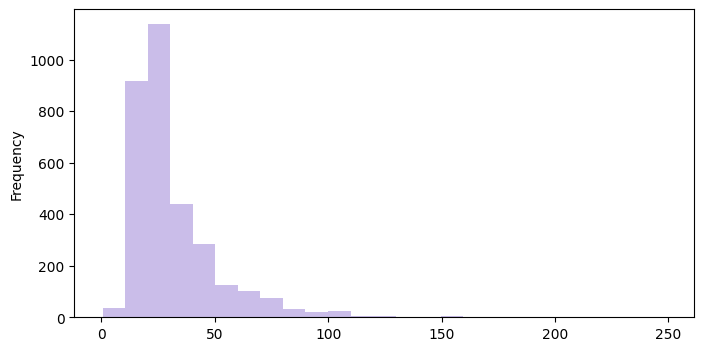



                     Boxplot                     


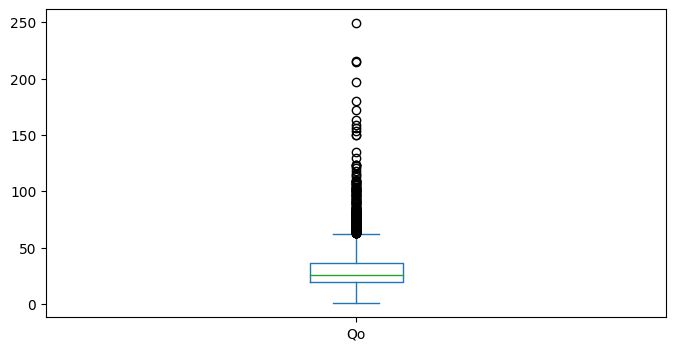




############################## Qw ##############################
                     Histograma                     


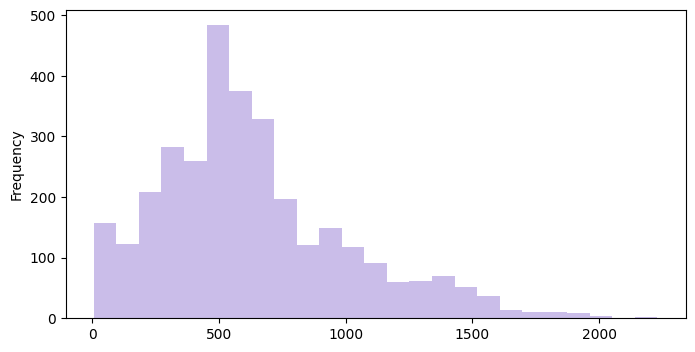



                     Boxplot                     


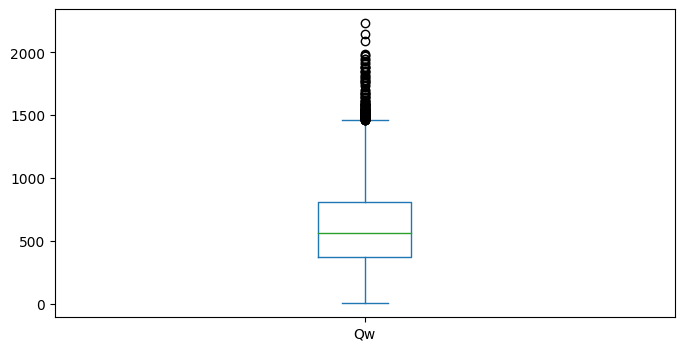




############################## CompL ##############################
                     Histograma                     


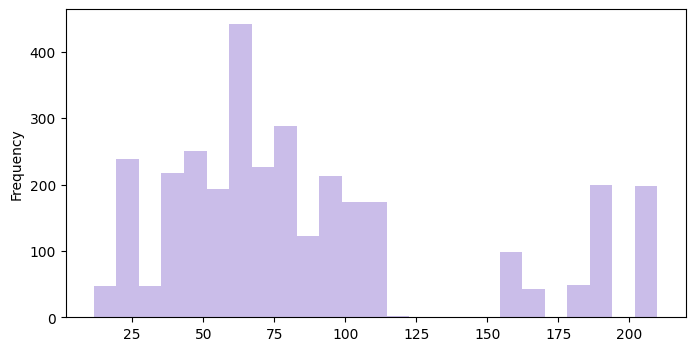



                     Boxplot                     


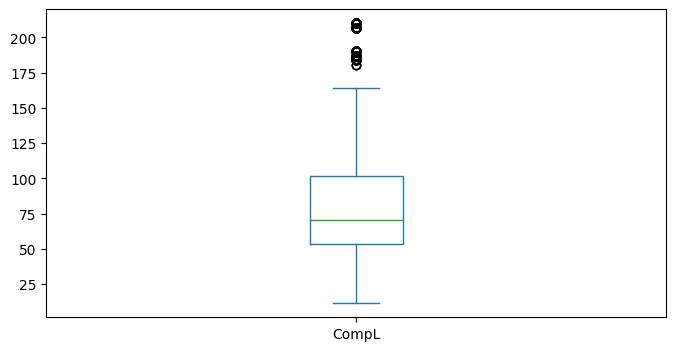




############################## FlowDays ##############################
                     Histograma                     


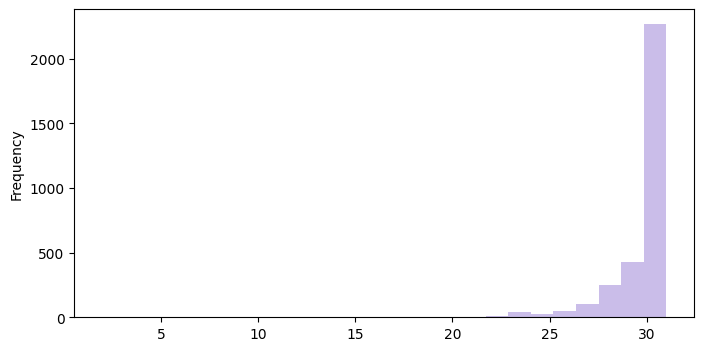



                     Boxplot                     


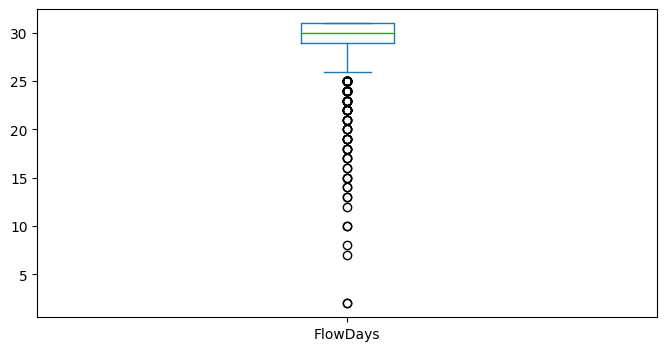




############################## TD ##############################
                     Histograma                     


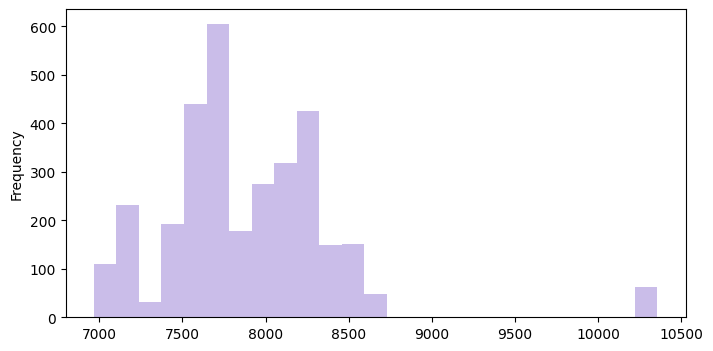



                     Boxplot                     


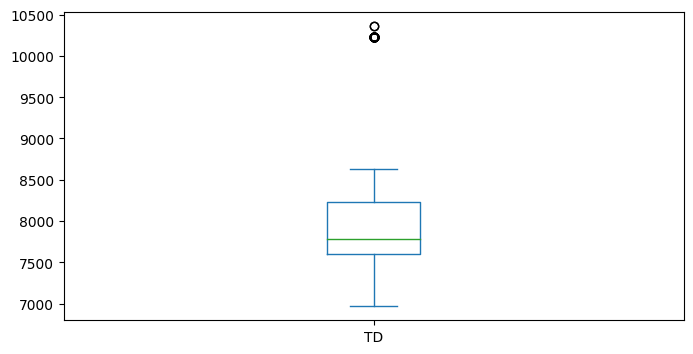

<Figure size 1000x1000 with 0 Axes>

In [22]:
for numerica in varNumericas:
  print("#"*30,numerica,"#"*30)
  analisisNumericas(df, numerica)
  plt.figure(figsize=(10,10))
  print("\n\n")

#### **Interpretación variables númericas**

**Comentario:** Del análisis de las variables numéricas se puede observar lo siguiente:
1. **Qo:** No posee una distribucion normal, posee outliers superiores.
2. **Qw:**  No posee una distribucion normal, posee outliers superiores. Histograma con islas separadas
3. **CompL:** Se observa que no sigue una distribución normal, histograma con islas separadas y posee outliers superiores.
4. **FlowDays:** No sigue una distribución normal, posee outliers inferiores.
5. **TD:**  No posee una distribucion normal, posee 2 outliers superiores.Histograma con islas separadas








### Tratamiento de Outlier y nulos en el target Qo y completamiento

En las gráficas anteriores (boxplot), vemos que entre Q1 y Q3 sabemos que están el 50% de los valores obtenidos en el estudio. A esta distancia se le llama rango intercuantílico (IQR: InterQuantile Range).

Para el tratamiento de estos outlier se decide definir una función que reciba como parámetros el conjunto de datos, el umbral inferior y el umbral superior. Y en la función se decide reemplazar por la media aquellos valores atípicos que estén por debajo del umbral inferior, y por la mediana aquellos que estén por encima del umbral superior. Cómo se muestra a continuación:



In [23]:
# ## Eliminando los outliers de Qo
#target = 'Qo'
## Eliminando los outliers del Qo
Q1_target = df[target].quantile(0.25)
Q3_target = df[target].quantile(0.75)
#se calcula el rango intercuantílico IQR
IQR_target = Q3_target - Q1_target
#Se define como valor atípico leve
#aquel que dista 1,5 veces el rango intercuantílico por debajo de Q1 o por encima de Q3
inf_target= Q1_target - 1.5 * IQR_target #vamos a calcular cual sería el umbral por abajo
sup_target= Q3_target + 1.5 * IQR_target #vamos a calcular cual sería el umbral por arriba
print('inf_target:',inf_target, 'sup_target:',sup_target)
#Quitando outlier
df=df[(df[target] >= inf_target) & (df[target] <= sup_target)]
print('Tamano despues de filtar los outliers de target: Qo',df.shape)
##Eliminando nulos
df.dropna(inplace=True)
print('Tamano despues de filtar los nulos de target',df.shape)

inf_target: -6.616308749999998 sup_target: 62.48758125
Tamano despues de filtar los outliers de target: Qo (2958, 15)
Tamano despues de filtar los nulos de target (2958, 15)


<ipython-input-23-85991eb72b4a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [24]:
CompL ='CompL' #declarando la variable
# ## Eliminando los outliers de CompL
Q1_CompL = df[CompL].quantile(0.25)
Q3_CompL  = df[CompL].quantile(0.75)
#se calcula el rango intercuantílico IQR
IQR_CompL  = Q3_CompL - Q1_CompL
#Se define como valor atípico leve
#aquel que dista 1,5 veces el rango intercuantílico por debajo de Q1 o por encima de Q3
inf_CompL = Q1_CompL  - 1.5 * IQR_CompL  #vamos a calcular cual sería el umbral por abajo
sup_CompL = Q3_CompL  + 1.5 * IQR_CompL  #vamos a calcular cual sería el umbral por arriba

print('inf_CompL :',inf_CompL , 'sup_CompL :',sup_CompL )
#Quitando outlier
df=df[(df[CompL] >= inf_CompL) & (df[CompL] <= sup_CompL)]
print('Tamano despues de filtar los outliers de CompL',df.shape)

##Eliminando nulos
df.dropna(inplace=True)
print('Tamano despues de filtar los nulos de CompL',df.shape)

inf_CompL : -25.426509999999993 sup_CompL : 177.98557
Tamano despues de filtar los outliers de CompL (2576, 15)
Tamano despues de filtar los nulos de CompL (2576, 15)


<ipython-input-24-225bcc7c2a0e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


### Correlacción de variables con respecto a Qo, Qw

In [25]:
# Eliminamos columnas que no nos aportan información relevante para la correlación
df = df.drop(['BHP'], axis=1)
df = df.drop(['lat'], axis=1)
df = df.drop(['long'], axis=1)
df= df.drop(['wellAPI'], axis=1)


In [26]:
df['Year'] = pd.to_numeric(df['Year'])

<ipython-input-27-2175ba64966b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Qg', y='reservoir', inner='box', palette='Dark2')


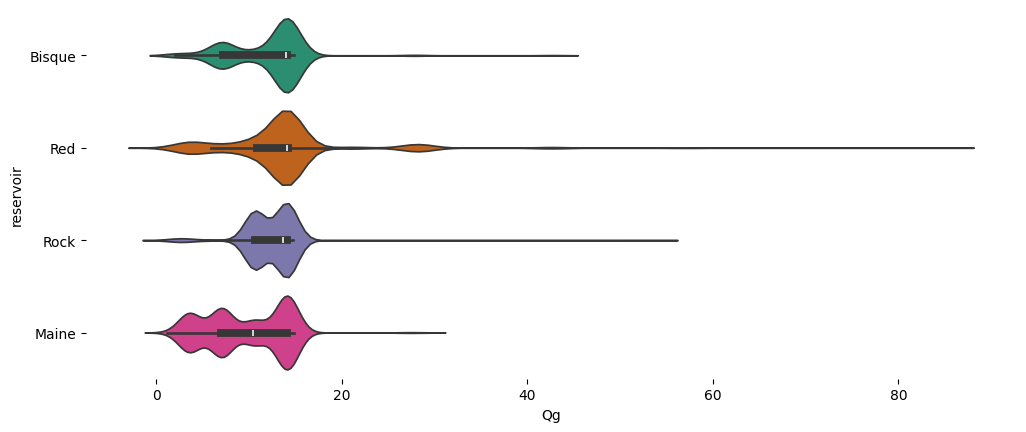

In [27]:
figsize = (12, 1.2 * len(df['reservoir'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Qg', y='reservoir', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

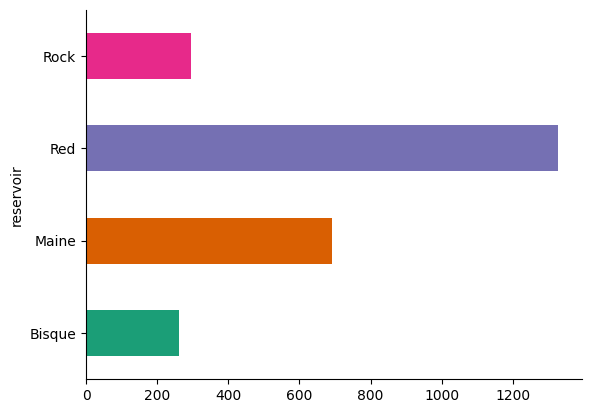

In [28]:
df.groupby('reservoir').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: title={'center': 'Qw'}, xlabel='reservoir'>

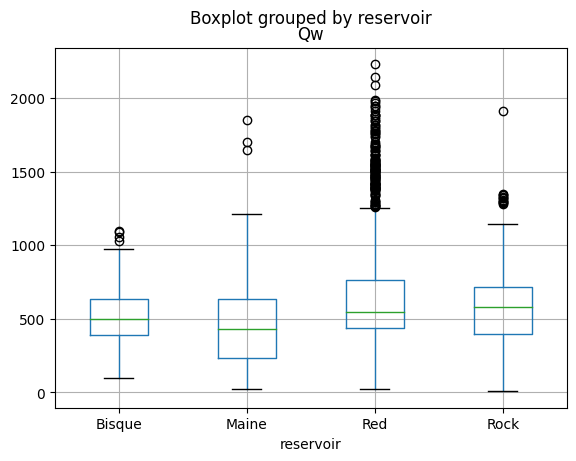

In [29]:
df.boxplot(column='Qw', by='reservoir')

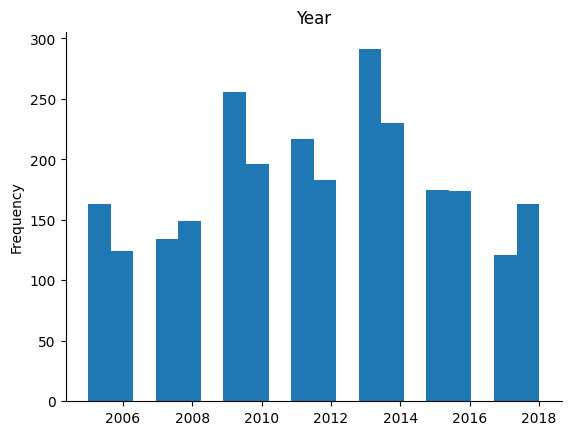

In [30]:
df['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

### **Veamos gráficamente cómo se comportan estas variables más influyentes con respecto a la tasa de producción de petróleo y agua.**

### Comportamiento de la tasa de producción de petróleo con respecto a la tasa de producción de agua.

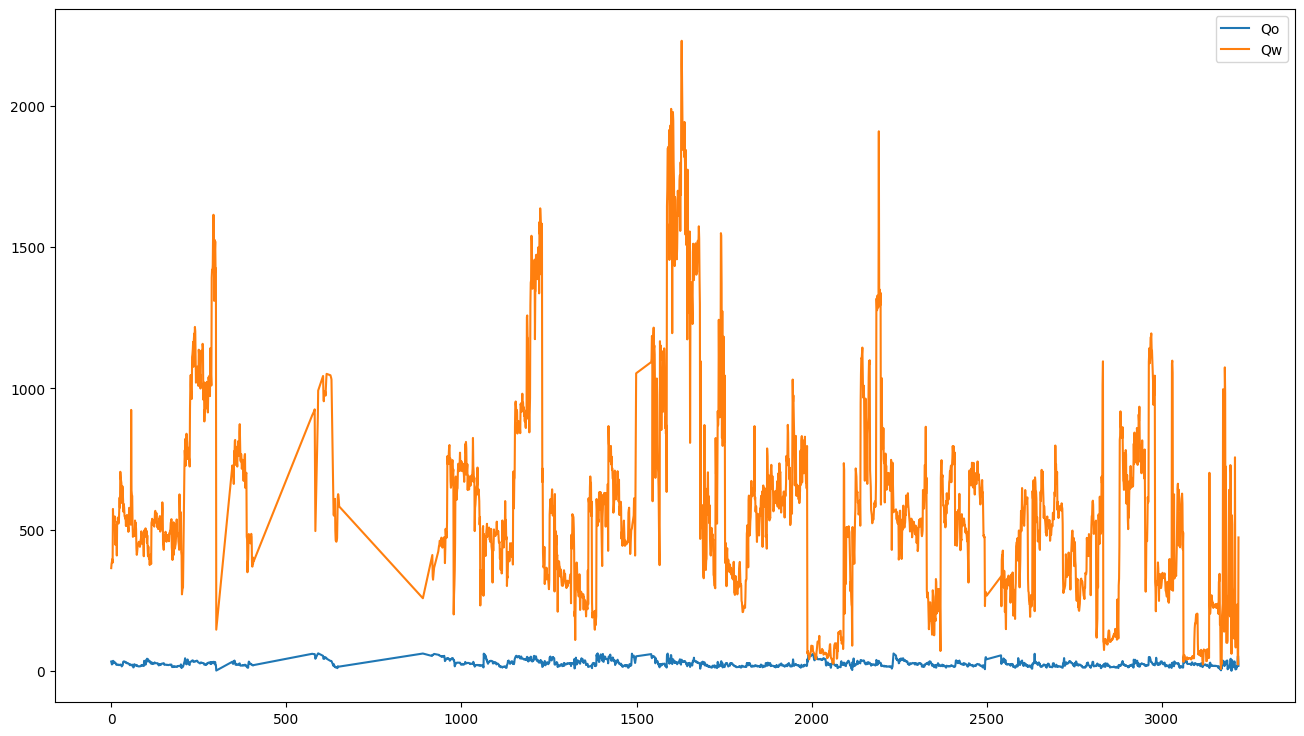

In [31]:
df[['Qo','Qw']].plot(figsize=(16,9))
plt.show()

### Comportamiento de la tasa de producción con respecto al completamiento.

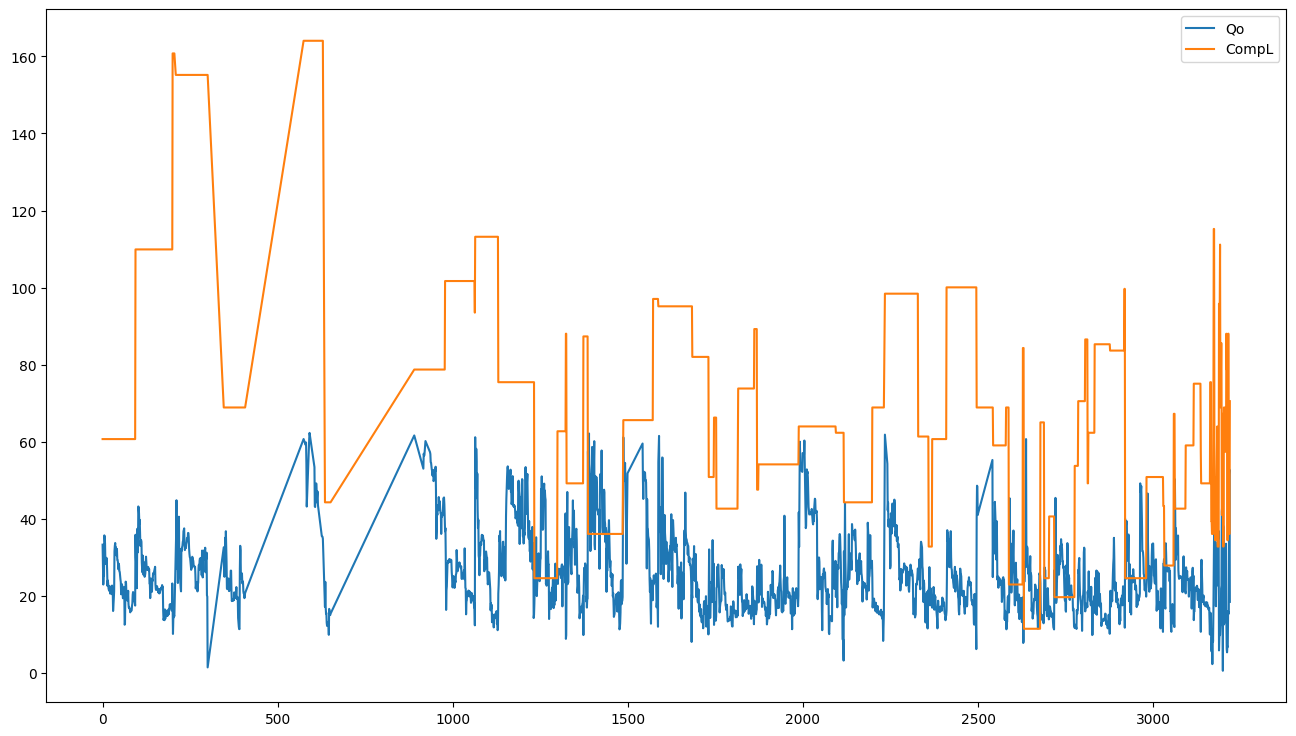

In [32]:
df[['Qo','CompL']].plot(figsize=(16,9))
plt.show()

### Completamiento vs. tasa de producción de petróleo.

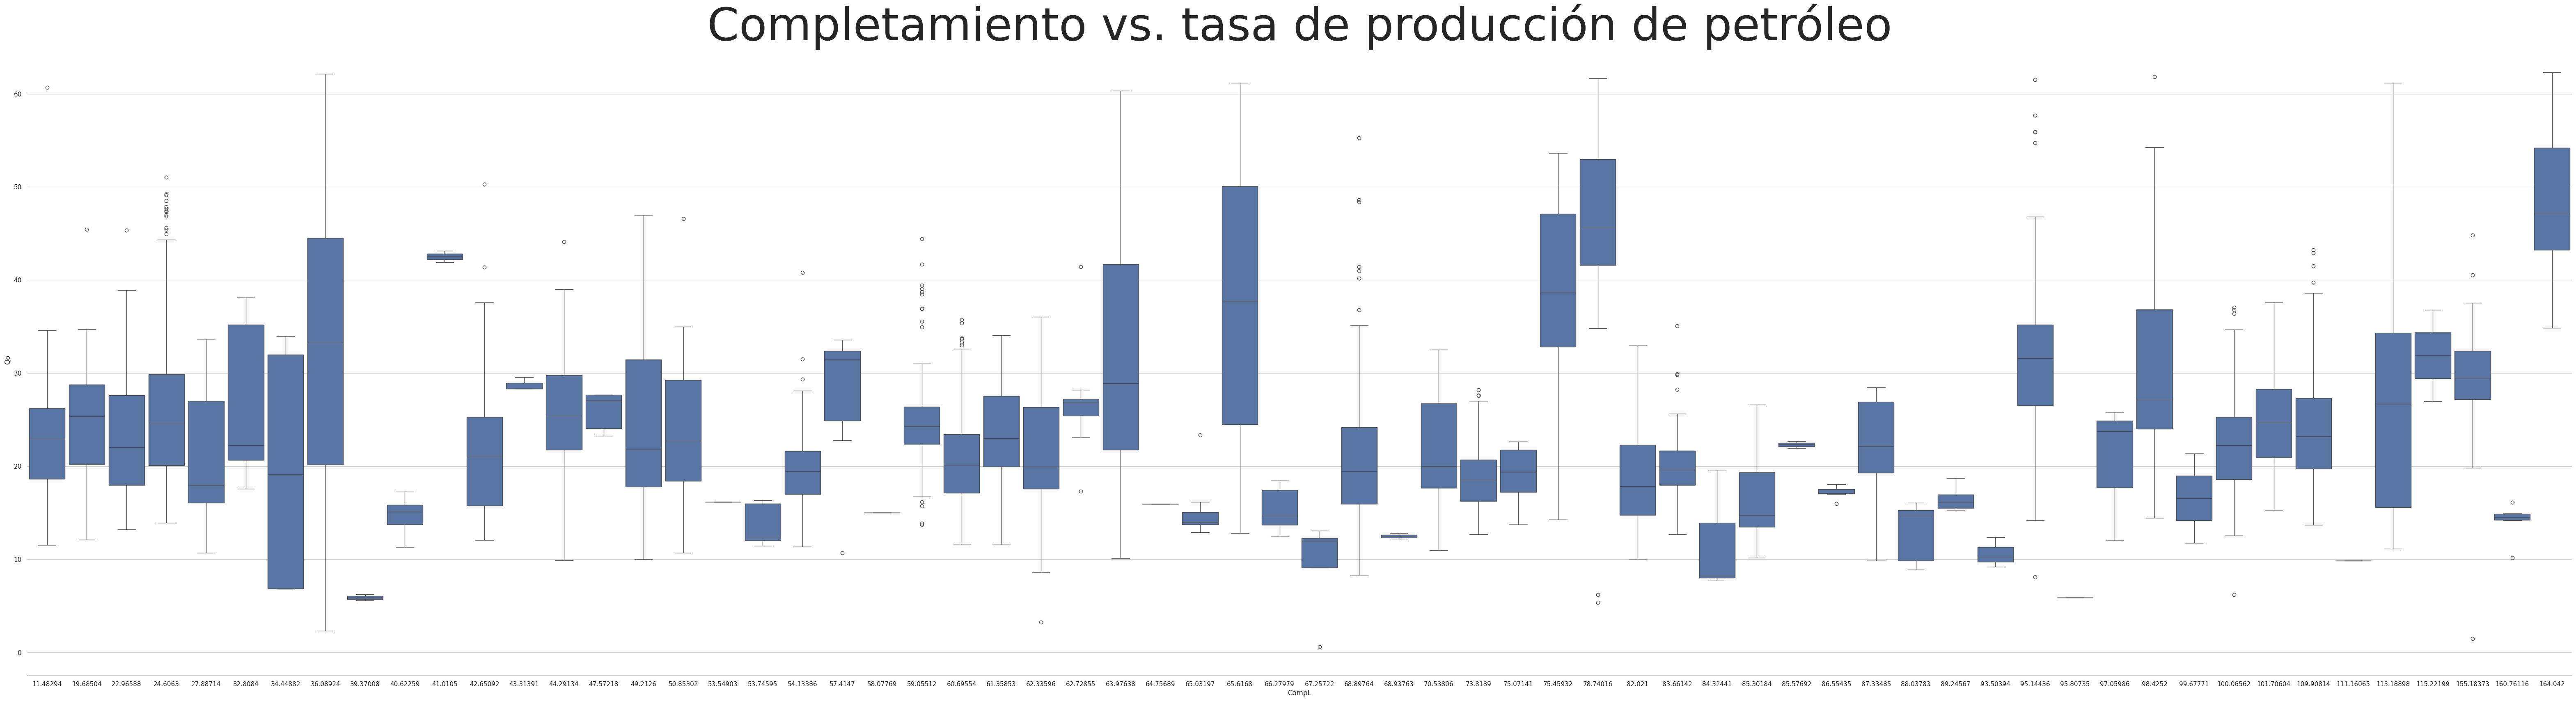

In [33]:
g= sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(80,20))
sns.boxplot(x=df.CompL,y=df.Qo, width=.9)
plt.title("Completamiento vs. tasa de producción de petróleo", fontsize=80)
#plt.ylim(0, 2)  # limitar y, para que los 'outliers' no ocupan la mayoría del espacio
sns.despine(top=True,
            right=True,
            left=True,
            bottom=False)

**¿Cuál es el completamiento que dá tasas más altas de producción de petróleo?**

El completamiento que dá tasas más altas de producción de petróleo es el de 36,08924 (ft), su caja naranja se ve más arriba que los demás y observa que este alcanza tasas de produccion de petróleo máximas de hasta 62 (bbl/d).


**¿Cuál es el completamiento que dá tasas más bajas de producción de petróleo?**

El completamiento que dá tasas más bajas de producción es el de 95.14436 (ft)su caja es prácticamente una línea se ve más abajo que los demás y observa que este alcanza tasas de producción mínimas de hasta 9 (bbl/d); esto puede deberse a otros factor (valores atípicos, etc) que se sugiere explorar detenidamente para contrastar la información de manera adecuada.


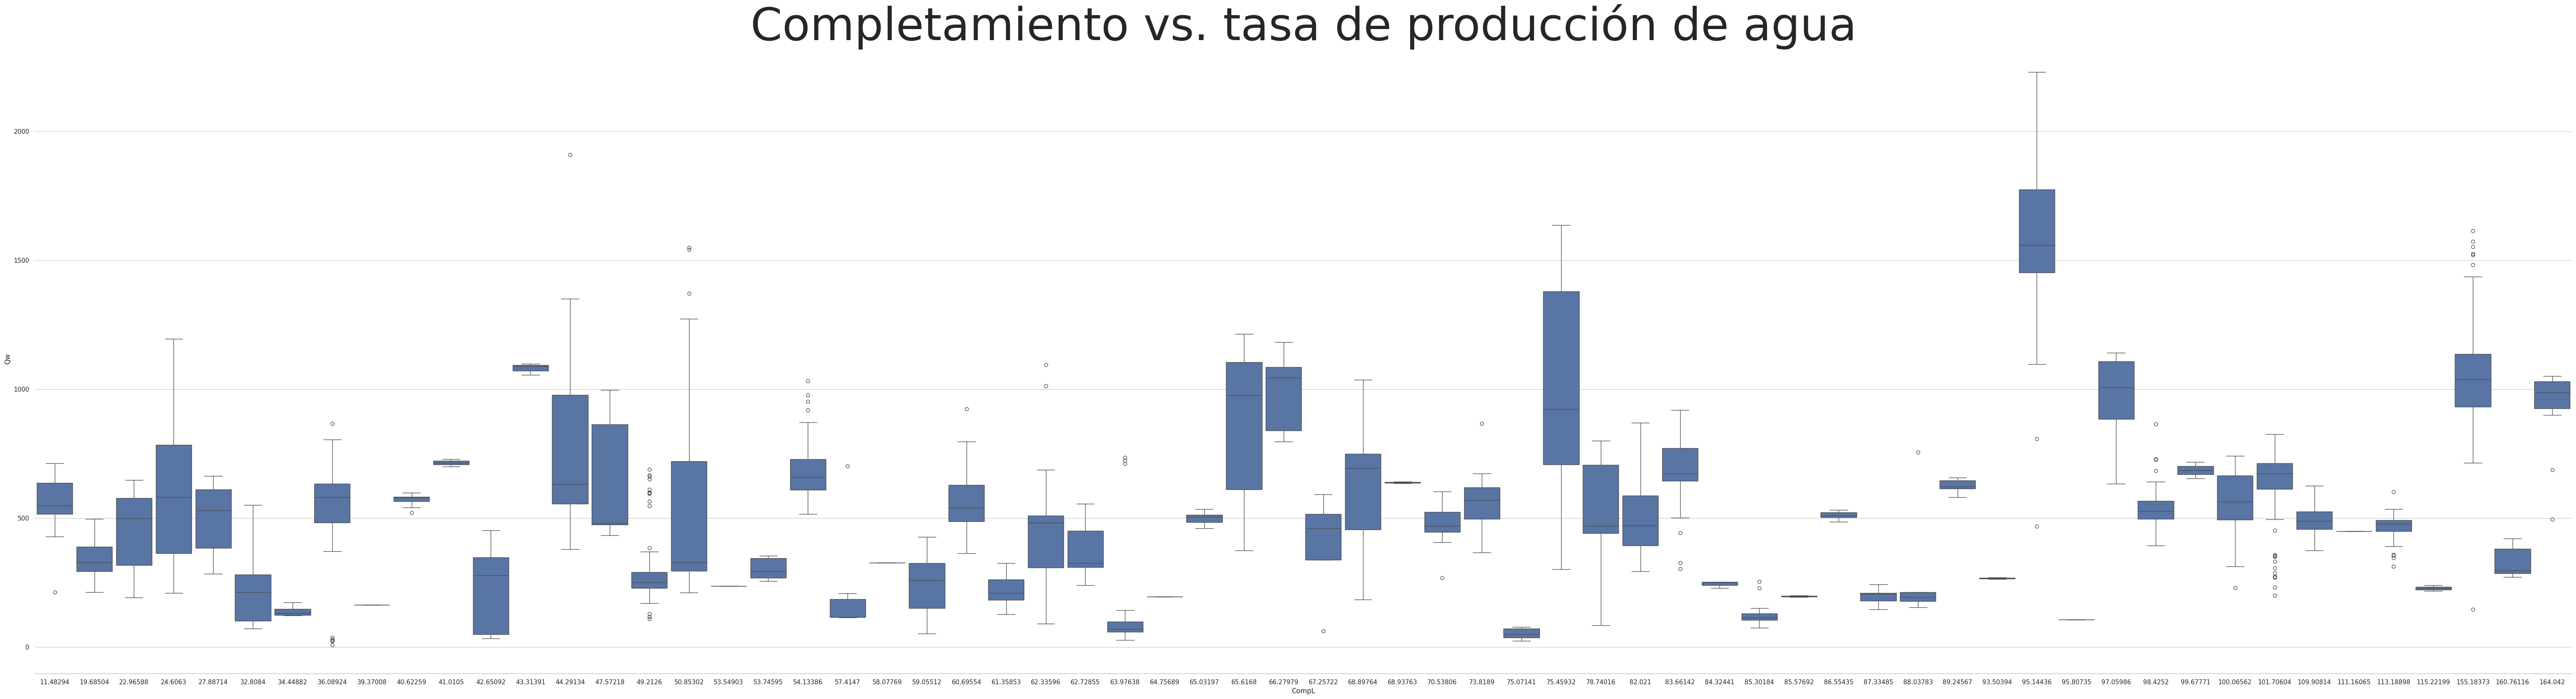

In [34]:
g= sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(80,20))
sns.boxplot(x=df.CompL,y=df.Qw, width=.9)
plt.title("Completamiento vs. tasa de producción de agua", fontsize=80)
#plt.ylim(0, 2)  # limitar y, para que los 'outliers' no ocupan la mayoría del espacio
sns.despine(top=True,
            right=True,
            left=True,
            bottom=False)

**¿Cuál es el completamiento que dá tasas más altas de producción de agua?**

El completamiento que dá tasas más altas de producción de agua es el de 95,80735 (ft), su caja morada se vé más arriba que los demás y observa que este alcanza tasas de producción de agua máximas de hasta 2000 (bbl/d). Esto justifica que su producción de petróleo sea la mínima). Revisar si se conecta con formaciones de agua (acuífero) cercanas.

**¿Cuál es el completamiento que dá tasas más bajas de producción de agua?**
El completamiento que dá tasas más bajas de producción de agua es el de 75,07141 (ft), su caja azul agua marina se vé más abajo que los demás y se observa que este alcanza tasas de producción de agua mínimas de hasta 10 (bbl/d).


## 3. Semana 4: Exploración de nuevas librerías Matplotlib y Seaborn y utilizar librerías Numpy y SciPy [1].

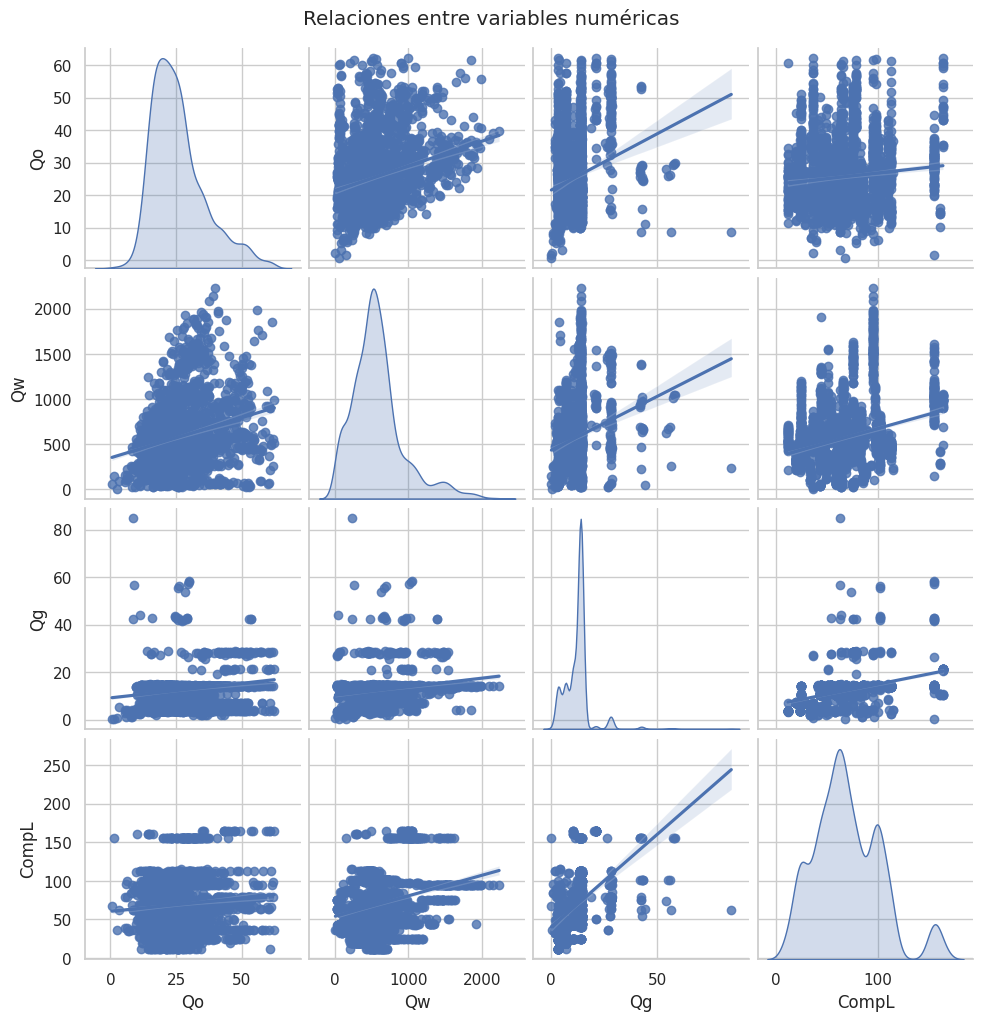

In [35]:

# Gráficos adicionales
# 1. Pairplot para ver las relaciones entre variables numéricas
sns.pairplot(df, vars=['Qo', 'Qw', 'Qg', 'CompL'], kind='reg', diag_kind='kde')
plt.suptitle('Relaciones entre variables numéricas', y=1.02)
plt.show()




**Este gráfico es "pairplot"** cómo podemos ver nos ayuda a entender cómo se relacionan entre sí algunas variables importantes en nuestros datos de producción de pozos [1]. Aquí se muestran cuatro variables clave:

Qo: La cantidad de petróleo producido
Qw: La cantidad de agua producida
Qg: La cantidad de gas producido
CompL: La longitud del completamiento del pozo

En el gráfico se observa:

**Distribución Individual de las Variables:**

Producción de Petróleo (Qo): La mayoría de los pozos producen menos de 60
unidades de petróleo. La mayor parte de la producción se concentra en cantidades pequeñas, con pocos pozos produciendo mucho.
Producción de Agua (Qw): Hay una gran variación en la cantidad de agua que se produce, con muchos pozos produciendo hasta 1000 unidades y algunos alcanzando hasta 2000 unidades.
Producción de Gas (Qg): La mayoría de los pozos producen menos de 20 unidades de gas.
Longitud del Completamiento (CompL): La longitud del completamiento varía entre los pozos, pero la mayoría están entre 0 y 100 unidades.

**Relaciones entre Variables:**

Petróleo vs. Agua (Qo vs. Qw): Parece que cuando se produce más agua, también se produce un poco más de petróleo, aunque no siempre es así.
Petróleo vs. Gas (Qo vs. Qg): No parece haber una relación clara entre la cantidad de petróleo y gas producidos. Los valores están bastante dispersos.
Petróleo vs. Longitud del Completamiento (Qo vs. CompL): La cantidad de petróleo tiende a aumentar un poco con la longitud del completamiento del pozo, pero hay mucha variabilidad.
Agua vs. Gas (Qw vs. Qg): No se observa una relación clara entre la producción de agua y la de gas.
Agua vs. Longitud del Completamiento (Qw vs. CompL): Similar al petróleo, la producción de agua también muestra una tendencia a aumentar con la longitud del completamiento, aunque no es una relación fuerte.
Gas vs. Longitud del Completamiento (Qg vs. CompL): La producción de gas no muestra una relación clara con la longitud del completamiento.

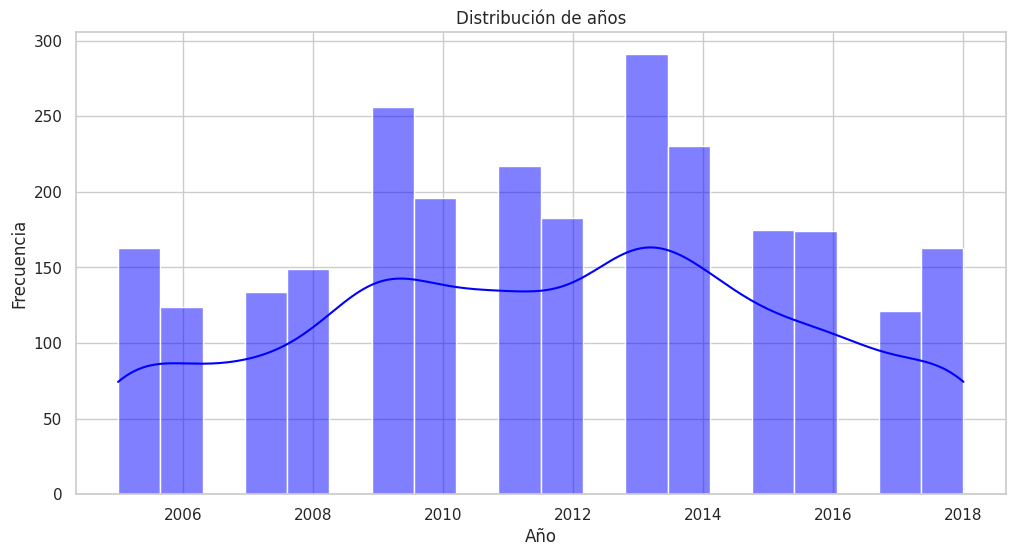

In [ ]:
#Distribución de la variable 'Year' a lo largo del tiempo

plt.figure(figsize=(12, 6))
sns.histplot(df['Year'], bins=20, kde=True, color='blue')
plt.title('Distribución de años')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.show()

Se observa que la cantidad de registros varía significativamente de un año a otro.Hay picos notables en la frecuencia alrededor de los años 2010, 2012 y 2014, donde el número de registros es particularmente alto, alcanzando más de 250 registros.

En general, la frecuencia de registros muestra una tendencia a aumentar desde 2005 hasta alrededor de 2012.
Después de 2014, la frecuencia de registros parece disminuir gradualmente hasta 2018.

La variabilidad en los datos sugiere fluctuaciones en la actividad de los pozos o en la recolección de datos durante los diferentes años.
Picos y Valles:

Hay puntos bajos significativos en 2006, 2009, y 2017, donde el número de registros es considerablemente menor.Los años con mayor cantidad de registros son 2010, 2012 y 2014.

Los picos en ciertos años podrían estar relacionados con eventos específicos, cambios en la metodología de recolección de datos, o variaciones en la actividad de perforación y producción. La tendencia decreciente después de 2014 podría indicar una reducción en la actividad de perforación.

<ipython-input-36-8f49d98c8d54>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='reservoir', y='Qo', palette='muted')


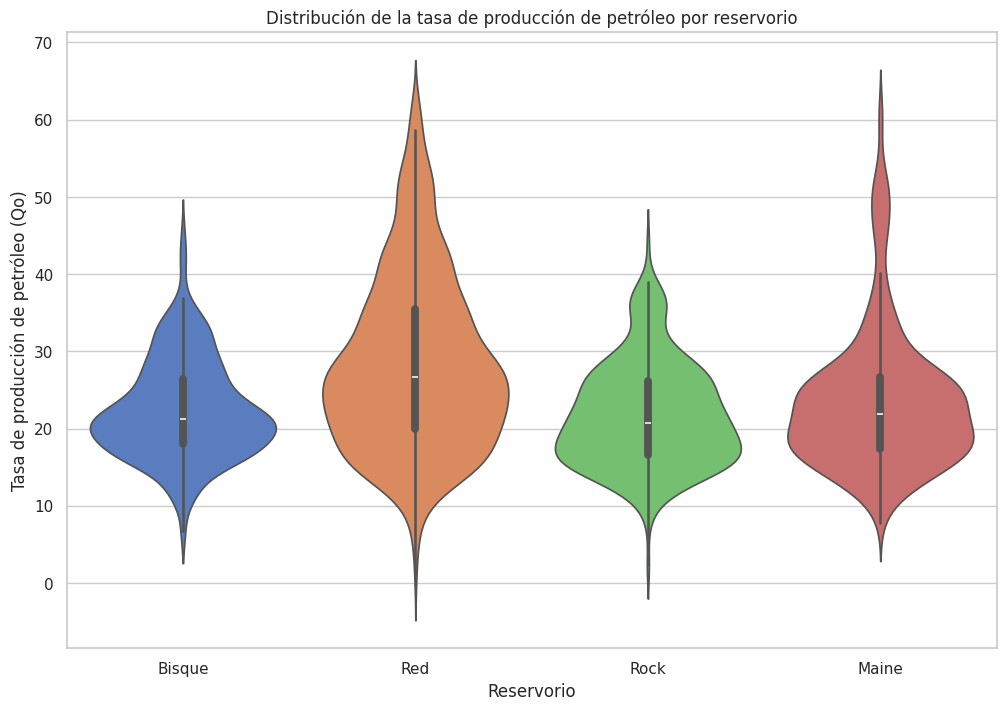

In [36]:
#Violin plot para ver la distribución de 'Qo' por 'reservoir'
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='reservoir', y='Qo', palette='muted')
plt.title('Distribución de la tasa de producción de petróleo por reservorio')
plt.xlabel('Reservorio')
plt.ylabel('Tasa de producción de petróleo (Qo)')
plt.show()

Se observa que el reservorio Red tiene la mayor variabilidad y rango de producción, con una distribución más amplia y centrada alrededor de 30 unidades. Bisque, por otro lado, presenta una producción más concentrada alrededor de 20 unidades, con menos variabilidad. Rock y Maine tienen distribuciones intermedias, siendo Maine más similar a Red en términos de rango y variabilidad.







<ipython-input-37-a13c8422e0b3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='reservoir', y='Qg', palette='pastel')


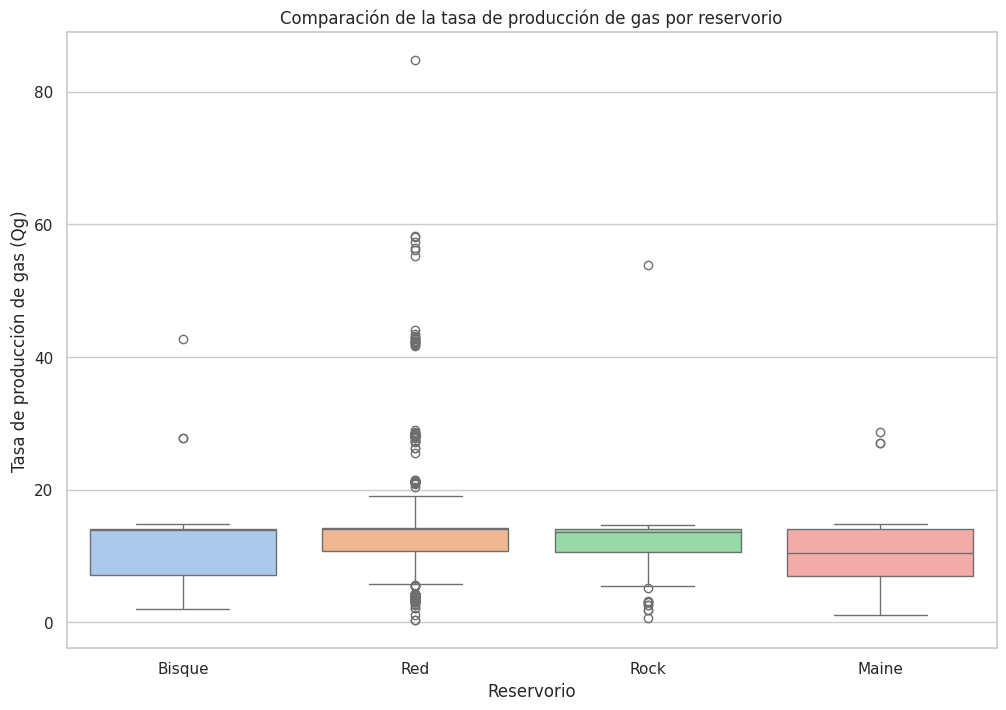

In [37]:
#Boxplot para comparar 'Qg' por 'reservoir'
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='reservoir', y='Qg', palette='pastel')
plt.title('Comparación de la tasa de producción de gas por reservorio')
plt.xlabel('Reservorio')
plt.ylabel('Tasa de producción de gas (Qg)')
plt.show()

La mayoría de los datos de producción de gas se concentran entre 0 y 20 unidades para todos los reservorios.Las cajas representan el rango intercuartil (IQR), que contiene el 50% de los datos centrales.


Se observa que las medianas de cada reservorio, se encuentran entre 10 y 15 unidades para todos los casos.No hay una gran diferencia en la mediana de la producción de gas entre los reservorios.

Hay varios valores atípicos presentes en cada reservorio, especialmente notables en Red y Rock.El reservorio Red tiene varios valores atípicos altos, llegando a más de 60 unidades, y un outlier extremo alcanzando 80 unidades.
Bisque y Maine también presentan outliers, pero no tan extremos como Red.
Comparación de Variabilidad:

La variabilidad dentro del rango intercuartil es similar entre los reservorios.
El reservorio Red muestra una mayor dispersión de valores atípicos en comparación con los otros.


Se observba que la producción de gas (Qg) es bastante consistente en su mayoría entre los diferentes reservorios, con medianas similares y rangos intercuartiles comparables. Sin embargo, el reservorio Red muestra una mayor cantidad de valores atípicos altos, lo que indica que algunos pozos en este reservorio tienen una producción de gas significativamente mayor.

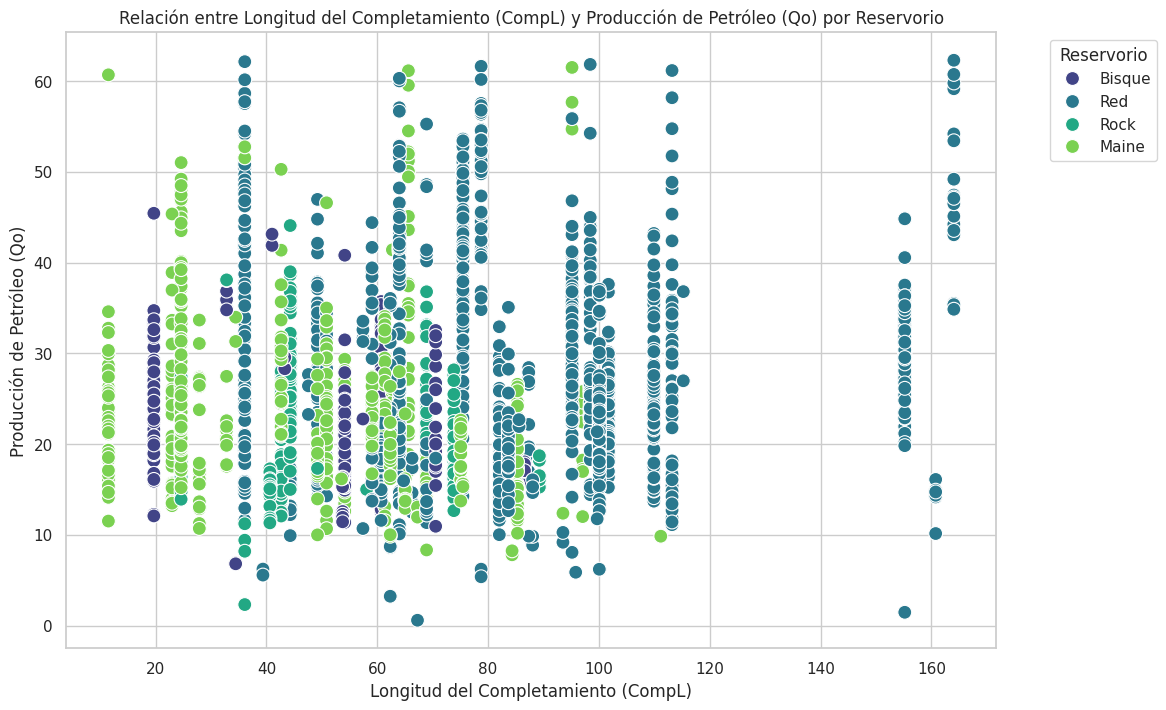

In [38]:
# Gráfico de dispersión
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='CompL', y='Qo', hue='reservoir', palette='viridis', s=100)
plt.title('Relación entre Longitud del Completamiento (CompL) y Producción de Petróleo (Qo) por Reservorio')
plt.xlabel('Longitud del Completamiento (CompL)')
plt.ylabel('Producción de Petróleo (Qo)')
plt.legend(title='Reservorio', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Este gráfico de dispersión muestra la relación entre la longitud del completamiento del pozo (CompL) y la producción de petróleo (Qo), diferenciando los datos por reservorio (Bisque, Red, Rock y Maine) [1]..


No se observa una relación clara y directa entre la longitud del completamiento (CompL) y la producción de petróleo (Qo). Los puntos están bastante dispersos a lo largo del rango de CompL.

Bisque (azul): La mayoría de los pozos tienen completamientos más cortos (entre 20 y 60) con producciones que varían hasta aproximadamente 40 unidades.
Red (naranja): Similar a Bisque, pero con algunos pozos con completamientos más largos y producciones más altas.
Rock (verde): Tiene una distribución de completamientos que se extiende hasta aproximadamente 100 unidades, con una producción de petróleo bastante dispersa.
Maine (verde claro): Presenta una distribución similar a Rock, con pozos que tienen completamientos tanto cortos como largos, y producciones dispersas.
Variabilidad:

Hay una alta variabilidad en la producción de petróleo para cualquier longitud de completamiento dada.
Los pozos con longitudes de completamiento más largas (CompL > 100) tienden a mostrar una producción de petróleo (Qo) más dispersa, pero no necesariamente más alta.

En definitiva se puede concluir que la longitud del completamiento del pozo no es un predictor fuerte de la producción de petróleo, ya que los datos están muy dispersos y no muestran una tendencia clara. La alta variabilidad indica que otros factores además de la longitud del completamiento pueden estar influyendo significativamente en la producción de petróleo. Además, las distribuciones de producción son similares entre los diferentes reservorios, aunque algunos reservorios tienen pozos con longitudes de completamiento ligeramente mayores.

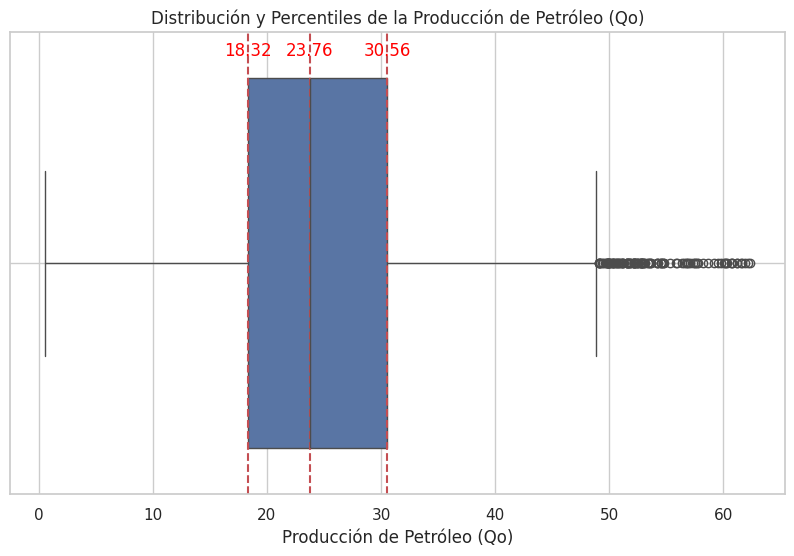

In [39]:
# Calcular los percentiles para la variable 'Qo' (Producción de Petróleo)
percentiles = np.percentile(df['Qo'], [25, 50, 75])

# Crear un gráfico de percentiles
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Qo'])
plt.title('Distribución y Percentiles de la Producción de Petróleo (Qo)')
plt.xlabel('Producción de Petróleo (Qo)')
plt.grid(True)

# Añadir líneas para los percentiles
for p in percentiles:
    plt.axvline(p, color='r', linestyle='--')
    plt.text(p, plt.ylim()[1]*0.9, f'{p:.2f}', color = 'red', fontsize=12, ha='center')

plt.show()

Se observa que la mayoría de los pozos tienen una producción de petróleo (Qo) entre 18.32 y 30.56 unidades. Sin embargo, hay pozos que producen mucho más, lo que se muestra como valores atípicos en el gráfico. La mediana indica que el valor central de la producción es 23.76 unidades [3].

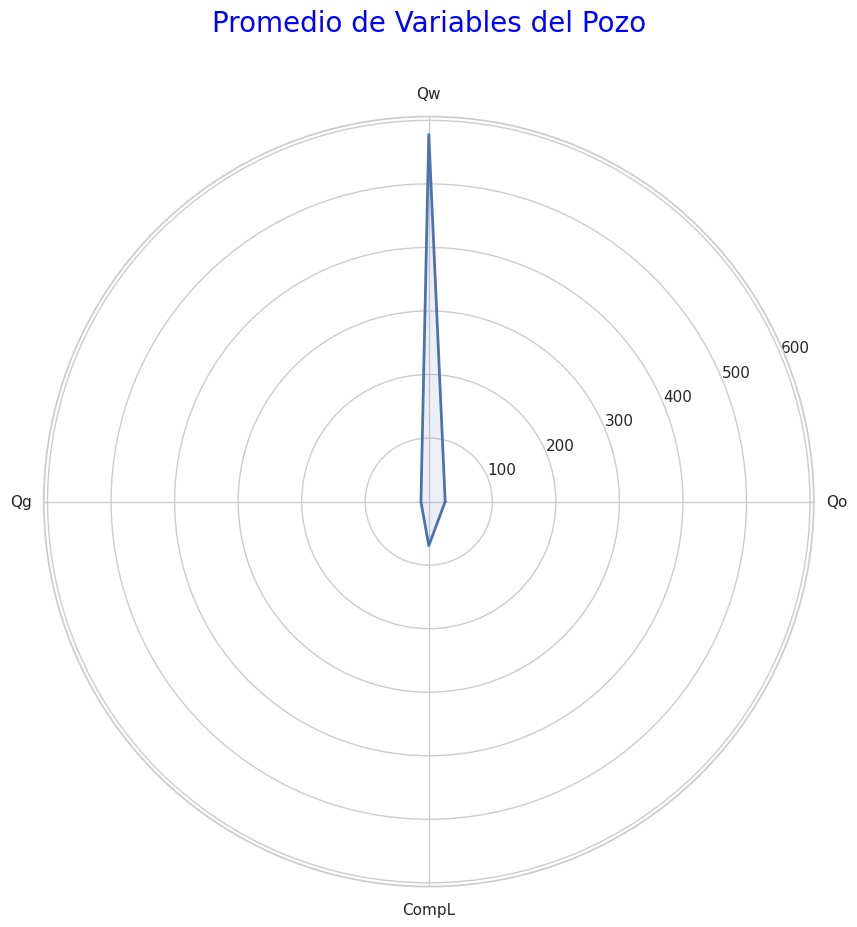

In [40]:
# Seleccionar las columnas que queremos visualizar
categories = ['Qo', 'Qw', 'Qg', 'CompL']
# Calcular la media de cada categoría
values = df[categories].mean().tolist()

# Añadir la primera media para cerrar el gráfico
values += values[:1]

# Número de variables
num_vars = len(categories)

# Ángulos para los ejes
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

# Crear el gráfico
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

# Dibujar los ejes
plt.xticks(angles[:-1], categories)

# Dibujar las líneas de datos
ax.plot(angles, values, linewidth=2, linestyle='solid')

# Rellenar el área
ax.fill(angles, values, 'b', alpha=0.1)

# Título
plt.title('Promedio de Variables del Pozo', size=20, color='blue', y=1.1)

# Mostrar el gráfico
plt.show()

El gráfico de araña muestra de manera visual las diferencias en los promedios de las variables del pozo. se observa que la producción de agua es claramente la más dominante, lo que podría indicar una alta presencia de agua en los pozos. La producción de petróleo y la longitud del completamiento son menores pero aún significativas. La producción de gas es la más baja, lo que sugiere que los pozos tienen un rendimiento de gas limitado[4].

# 4. Semana 6: Medidas de posición central, Relación entre medias, Medidas de posición no central, Medidas de dispersión, Asimetría y curtosis, Frecuencias y los Gráficos [1].

In [41]:
print("\nEstadísticas descriptivas del dataframe:")
print(df.describe())


Estadísticas descriptivas del dataframe:
              Year           Qo           Qw           Qg        CompL  \
count  2576.000000  2576.000000  2576.000000  2576.000000  2576.000000   
mean   2011.622283    25.788266   577.677329    12.356116    69.409242   
std       3.717473    10.300594   352.262401     6.107280    32.435192   
min    2005.000000     0.582310     7.001600     0.330820    11.482940   
25%    2009.000000    18.320278   344.003137    10.355670    44.291340   
50%    2012.000000    23.757150   526.896110    13.913155    63.976380   
75%    2014.000000    30.556793   704.640348    14.160400    95.144360   
max    2018.000000    62.307270  2230.359120    84.755190   164.042000   

          FlowDays            TD  
count  2576.000000   2576.000000  
mean     29.550845   7928.141288  
std       2.275012    540.665748  
min       2.000000   6966.864000  
25%      28.999980   7595.145000  
50%      30.000000   7867.454000  
75%      31.000000   8251.313000  
max      31

In [44]:
print(df.columns)


Index(['Year', 'Month', 'Wellname', 'Qo', 'Qw', 'Qg', 'CompL', 'FlowDays',
       'Type', 'TD', 'reservoir'],
      dtype='object')


Columnas disponibles en el dataframe: Index(['Year', 'Month', 'Wellname', 'Qo', 'Qw', 'Qg', 'CompL', 'FlowDays',
       'Type', 'TD', 'reservoir'],
      dtype='object')


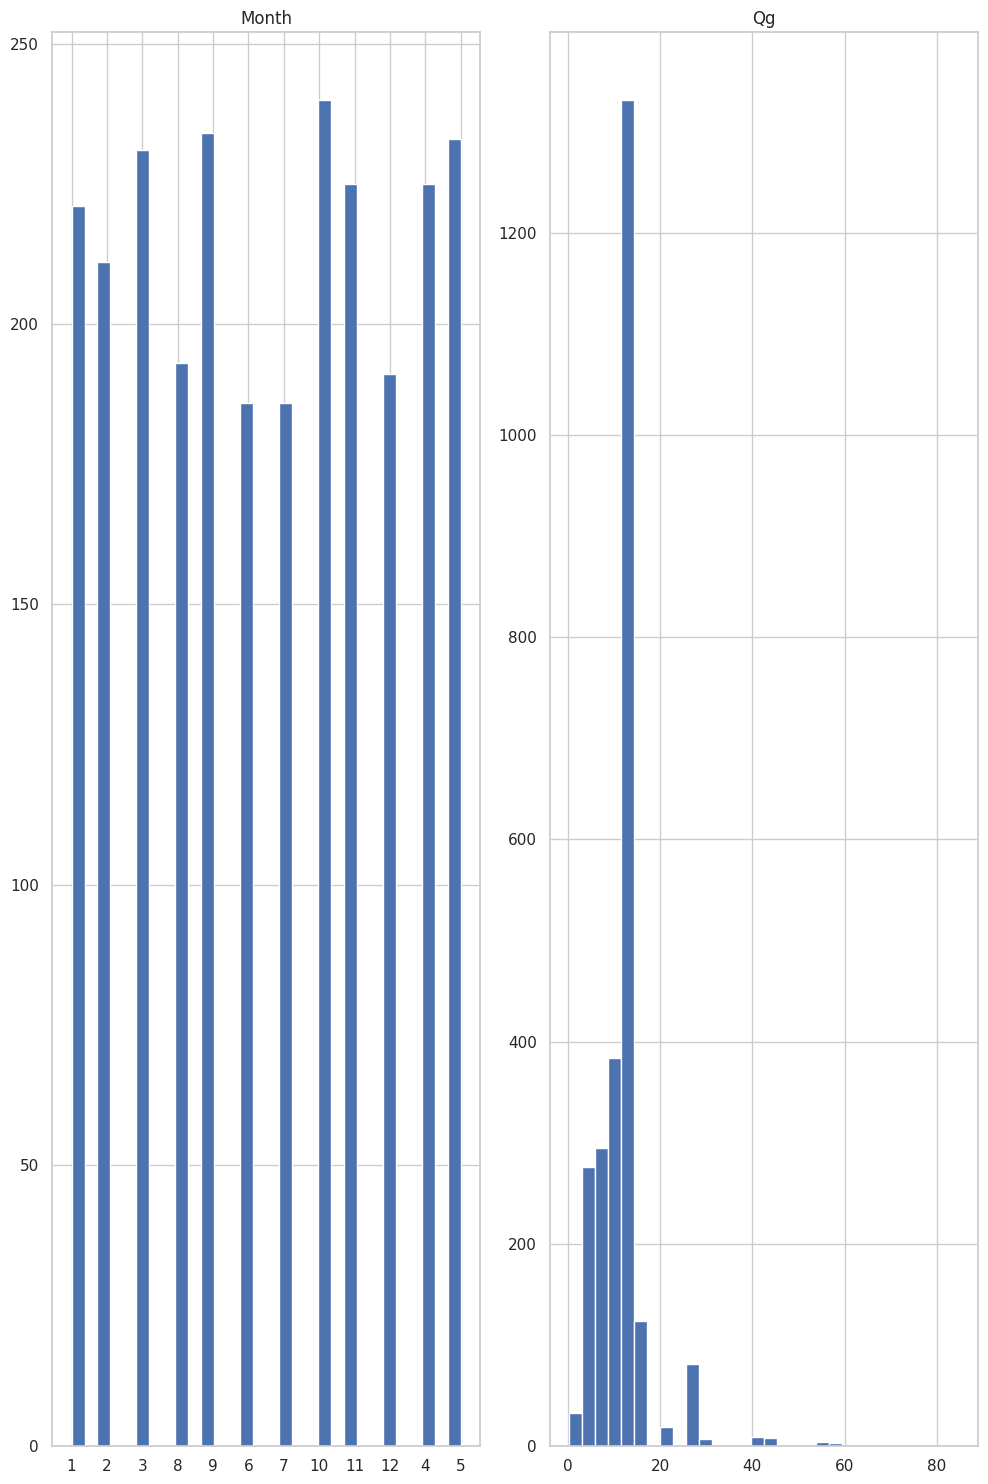

In [45]:
import matplotlib.pyplot as plt

# Visualizar las columnas disponibles
print("Columnas disponibles en el dataframe:", df.columns)


num_vars = df.iloc[:, [1, 5] + list(range(12, min(24, len(df.columns))))]

# Número de columnas y filas para subplots
n_cols = 4
n_rows = (len(num_vars.columns) + n_cols - 1) // n_cols  # Número de filas necesarias para visualización

# Figura con subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))

# Aplanar los ejes para iterar
axes = axes.flatten()  # De un arreglo multidimensional a un arreglo unidimensional

# Iterar sobre cada columna de las variables numéricas y cada eje
for i, column in enumerate(num_vars.columns):
    ax = axes[i]
    num_vars[column].hist(ax=ax, bins=30)  # Método pandas, parámetro 'ax' en donde se creará la figura
    ax.set_title(column)
    ax.set_xlabel('')  # Sin etiqueta, vacía
    ax.set_ylabel('')  # Sin etiqueta, vacía

# Eliminar subplots vacíos
for j in range(i + 1, len(axes)):  # Desde la última figura (i+1), hasta el total de subplots
    fig.delaxes(axes[j])  # Eliminar subplots vacíos

# Ajustar el layout para que no se sobrepongan los títulos y etiquetas
plt.tight_layout()
plt.show()



El histograma mensual muestra una distribución suave, lo que muestra que los datos se distribuyen uniformemente a lo largo de los meses del año. En comparación, el histograma "Qg" muestra una distribución asimétrica recta, con la mayoría de los valores concentrados en el rango inferior y algunos extremos superiores. Esto indica que existen valores atípicos en "Qg" que pueden afectar significativamente a análisis posteriores y deben considerarse cuidadosamente.

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd


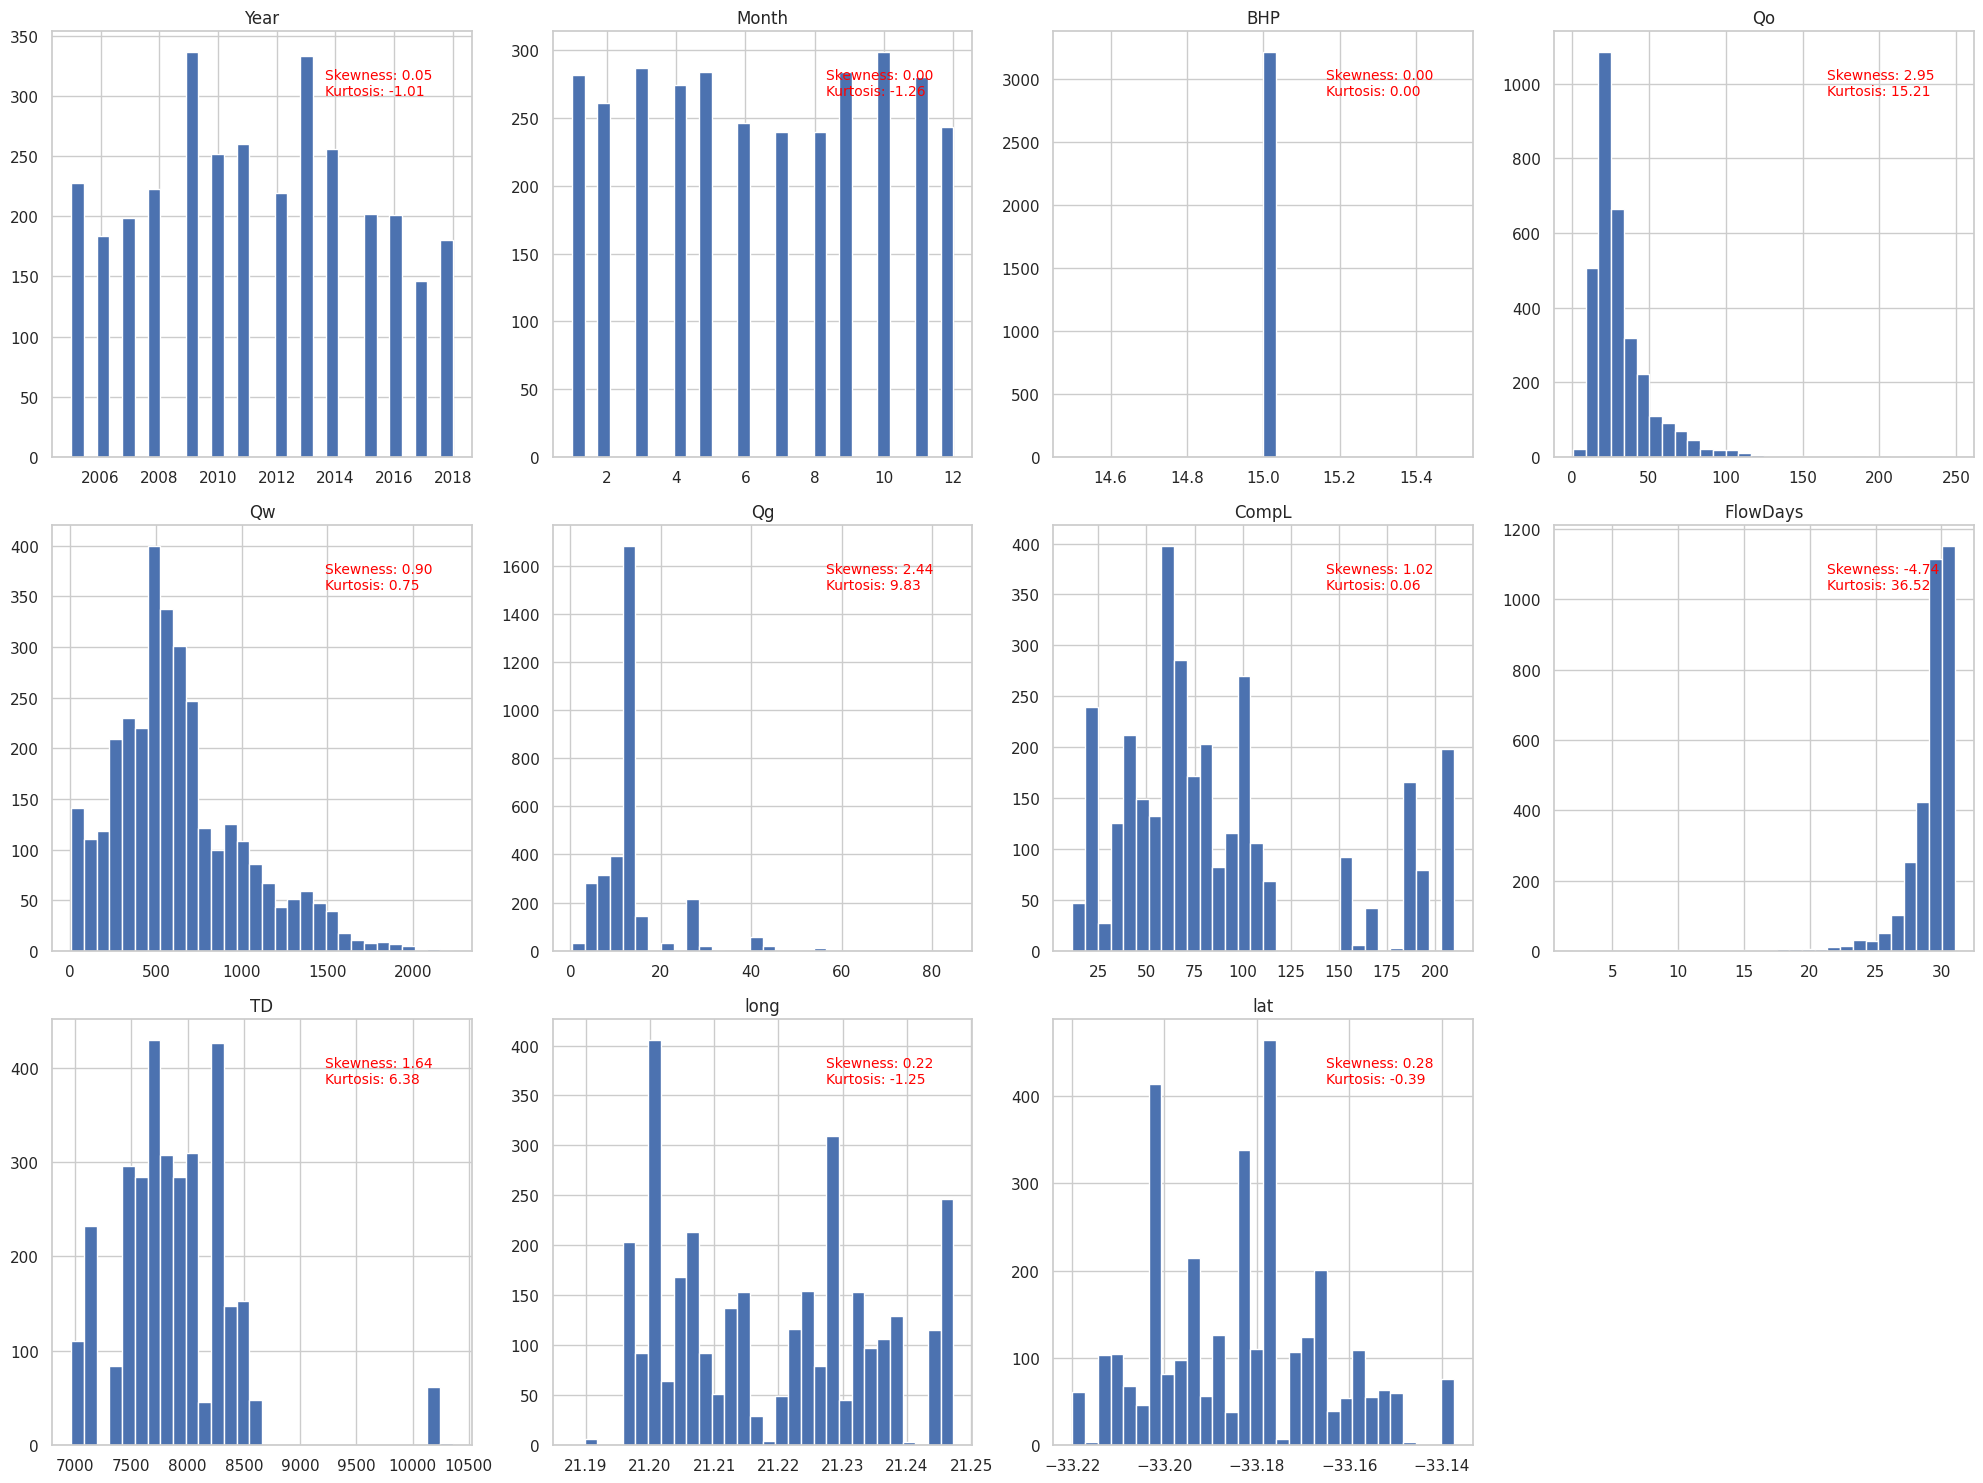

In [50]:


# Seleccionar solo las columnas numéricas
num_vars = df.select_dtypes(include=[float, int])

# Subplots
n_cols = 4
n_rows = (len(num_vars.columns) + n_cols - 1) // n_cols

# Figura y ejes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
axes = axes.flatten()

# Iterar sobre cada columna
for i, column in enumerate(num_vars.columns):
    ax = axes[i]

    # Histograma de la variable
    num_vars[column].hist(ax=ax, bins=30)
    ax.set_title(column)
    ax.set_xlabel('')
    ax.set_ylabel('')

    # Calcular y mostrar asimetría y curtosis
    skewness = num_vars[column].skew()  # Grado de asimetría
    kurtosis = num_vars[column].kurtosis()  # Grado de apuntamiento
    ax.annotate(f'Skewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}', xy=(0.65, 0.85), xycoords='axes fraction', fontsize=10, color='red')

# Eliminar subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el layout para que no se sobrepongan los títulos y etiquetas
plt.tight_layout()
plt.show()


Al observar el histograma de asimetría y curtosis, observo que la variable "mes" se distribuye uniformemente a lo largo del año, lo que indica una recopilación continua de información mensual. En comparación, variables como "Qo" (producción de petróleo), "Qg" (producción de gas natural), "FlowDays" (número de días de flujo) y "TD" (profundidad total) muestran una asimetría positiva significativa, lo que demuestra que la mayoría de los Los valores son relativamente bajos, pero según algunas observaciones es mucho mayor. Esto también se refleja en la curtosis de "Qo" y "FlowDays", que muestra que estas distribuciones tienen picos muy distintos y colas largas, lo que demuestra la existencia de valores extremos. Por otro lado, la variable "año" tiene una distribución relativamente simétrica con baja curtosis. Además, algunas variables (como "BHP") muestran una concentración de un valor, lo que puede indicar una falta de cambio en esta medida. En general, juzgo que estos patrones y sesgos distributivos son aspectos importantes a considerar cuando ya estemos modelando.

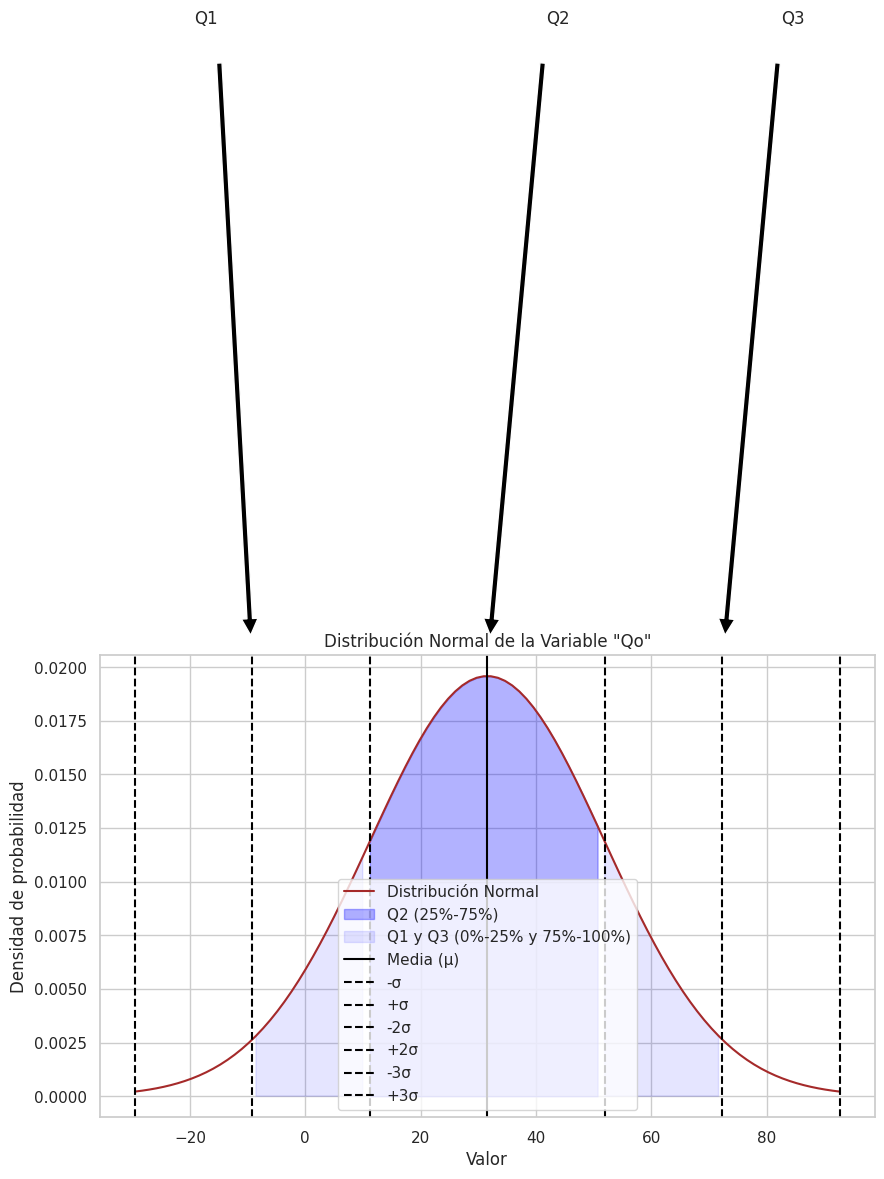

In [51]:

# Seleccionar la variable numérica para el análisis
data = df['Qo'].dropna()  # Asegúrate de eliminar los valores nulos

# Calcular la media y desviación estándar
mu, sigma = data.mean(), data.std()

# Crear una serie de valores para la distribución normal
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar la distribución normal
ax.plot(x, y, label='Distribución Normal', color='brown')

# Rellenar las áreas correspondientes a los cuartiles
ax.fill_between(x, y, where=((x >= mu - sigma) & (x <= mu + sigma)), color='blue', alpha=0.3, label='Q2 (25%-75%)')
ax.fill_between(x, y, where=((x >= mu - 2*sigma) & (x < mu - sigma)) | ((x > mu + sigma) & (x <= mu + 2*sigma)), color='blue', alpha=0.1, label='Q1 y Q3 (0%-25% y 75%-100%)')

# Marcar la media y los límites de los cuartiles
ax.axvline(mu, color='black', linestyle='-', label='Media (µ)')
ax.axvline(mu - sigma, color='black', linestyle='--', label='-σ')
ax.axvline(mu + sigma, color='black', linestyle='--', label='+σ')
ax.axvline(mu - 2*sigma, color='black', linestyle='--', label='-2σ')
ax.axvline(mu + 2*sigma, color='black', linestyle='--', label='+2σ')
ax.axvline(mu - 3*sigma, color='black', linestyle='--', label='-3σ')
ax.axvline(mu + 3*sigma, color='black', linestyle='--', label='+3σ')

# Anotar los cuartiles
ax.annotate('Q1', xy=(mu - 2*sigma, 0.02), xytext=(mu - 2.5*sigma, 0.05),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)
ax.annotate('Q2', xy=(mu, 0.02), xytext=(mu + 0.5*sigma, 0.05),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)
ax.annotate('Q3', xy=(mu + 2*sigma, 0.02), xytext=(mu + 2.5*sigma, 0.05),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)

# Etiquetas y título
ax.set_title('Distribución Normal de la Variable "Qo"')
ax.set_xlabel('Valor')
ax.set_ylabel('Densidad de probabilidad')
ax.legend()

# Mostrar el gráfico
plt.show()


Al observar el gráfico, noto que representa la distribución normal de la variable del pozo "Qo". La mayoría de los datos se agrupan alrededor de la media (Q2), que oscila entre aproximadamente 20 y 60, que es el 50% central de los datos. Las áreas sombreadas más claras representan el primer cuartil (Q1) y el tercer cuartil (Q3), cubriendo los rangos aproximados de -20 a 20 y 60 a 100, respectivamente. Esto muestra que la mayoría de las mediciones de "Qo" están cerca de la media. con menos lecturas muy bajas o altas. Este patrón indica que la producción del pozo es bastante consistente, con la mayoría de las mediciones de "Qo" agrupadas alrededor de un valor medio y alguna variación extrema que puede indicar un desempeño estable del pozo [6].

In [52]:
# Asegurarnos de seleccionar solo las variables numéricas relevantes
numeric_columns = df.select_dtypes(include=[float, int]).columns

# Media y desviación estándar para cada variable numérica
mean = df[numeric_columns].mean()
std = df[numeric_columns].std()

# Límites inferiores y superiores para identificar valores atípicos
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

# Serie booleana para rastrear las filas sin valores atípicos (en principio todos son true)
sin_atipicos = pd.Series([True] * len(df))

# Iterar sobre cada columna y actualizar la Serie booleana si una fila contiene valores atípicos
for column in numeric_columns:
    valores_if = ((df[column] >= lower_bound[column]) & (df[column] <= upper_bound[column]))
    sin_atipicos = sin_atipicos & valores_if

# Filtrar las filas que no contienen valores atípicos
df_sin_atipicos = df[sin_atipicos]

# Mostrar las primeras filas del dataframe sin valores atípicos
print(df_sin_atipicos.head())

# Mostrar el número de filas antes y después de filtrar los valores atípicos
print(f"Número de filas antes de filtrar: {len(df)}")
print(f"Número de filas después de filtrar: {len(df_sin_atipicos)}")


   Year  Month     wellAPI Wellname  BHP        Qo         Qw        Qg  \
0  2005      1  2ECFC837AC  Well025   15  33.30351  363.87170  13.85077   
1  2005      2  2ECFC837AC  Well025   15  27.24609  378.91081  14.23028   
2  2005      3  2ECFC837AC  Well025   15  22.95982  385.97324  13.93621   
3  2005      8  2ECFC837AC  Well025   15  25.33575  395.48484  13.87802   
4  2005      9  2ECFC837AC  Well025   15  25.15923  383.04923  14.12587   

      CompL  FlowDays      Type        TD reservoir       long        lat  
0  60.69554  29.99997  Producer  7509.843    Bisque  21.204409 -33.169318  
1  60.69554  28.00000  Producer  7509.843    Bisque  21.204409 -33.169318  
2  60.69554  31.00000  Producer  7509.843    Bisque  21.204409 -33.169318  
3  60.69554  29.99997  Producer  7509.843    Bisque  21.204409 -33.169318  
4  60.69554  30.00000  Producer  7509.843    Bisque  21.204409 -33.169318  
Número de filas antes de filtrar: 3220
Número de filas después de filtrar: 2942


In [54]:
df_sin_atipicos.shape

(2942, 15)

In [57]:
len(df_sin_atipicos)/len(df)

0.9136645962732919

A partir de estos resultados, se puede ver que al utilizar el procedimiento de eliminación de valores atípicos basado en la desviación estándar, el número total de registros en el conjunto de datos se redujo de 3220 a 2942. Esto significa que 278 registros contienen valores atípicos extremos que podrían sesgar el análisis estadístico posterior. y la interpretación fueron identificados y eliminados. El conjunto de datos filtrados almacena información importante sobre el rendimiento del pozo petrolero, incluidos datos como el año y mes de registro, identificadores únicos del pozo (wellAPI y Wellname), parámetros de producción como la producción de petróleo (Qo), agua (Qw) y gas (Qg). ). ), así como parámetros operativos como profundidad total (TD) y coordenadas geográficas (latitud y longitud).
Este proceso de limpieza de datos es importante en la industria del petróleo y el gas porque garantiza que los análisis posteriores se basen en datos confiables y representativos, eliminando la influencia de mediciones extremas o erróneas que pueden distorsionar los resultados. La eliminación de valores atípicos proporciona una imagen más precisa y consistente del rendimiento y la productividad, lo que le ayuda a tomar decisiones informadas y optimizar la producción [8].

In [58]:

# Seleccionar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=[float, int]).columns

# Calcular el rango intercuartílico (IQR) para cada variable numérica
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Límites inferior y superior para identificar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Inicializar una Serie booleana para mantener el rastreo de las filas sin valores atípicos
sin_atipicos = pd.Series([True] * len(df))

# Iterar sobre cada columna y actualizar la Serie booleana si una fila contiene valores atípicos
for column in numeric_columns:
    valores_if = ((df[column] >= lower_bound[column]) & (df[column] <= upper_bound[column]))
    sin_atipicos = sin_atipicos & valores_if

# Filtrar las filas que no contienen valores atípicos
df_sin_atipicos = df[sin_atipicos]

# Mostrar las primeras filas del dataframe sin valores atípicos
print(df_sin_atipicos.head())

# Mostrar el número de filas antes y después de filtrar los valores atípicos
print(f"Número de filas antes de filtrar: {len(df)}")
print(f"Número de filas después de filtrar: {len(df_sin_atipicos)}")


   Year  Month     wellAPI Wellname  BHP        Qo         Qw        Qg  \
0  2005      1  2ECFC837AC  Well025   15  33.30351  363.87170  13.85077   
1  2005      2  2ECFC837AC  Well025   15  27.24609  378.91081  14.23028   
2  2005      3  2ECFC837AC  Well025   15  22.95982  385.97324  13.93621   
3  2005      8  2ECFC837AC  Well025   15  25.33575  395.48484  13.87802   
4  2005      9  2ECFC837AC  Well025   15  25.15923  383.04923  14.12587   

      CompL  FlowDays      Type        TD reservoir       long        lat  
0  60.69554  29.99997  Producer  7509.843    Bisque  21.204409 -33.169318  
1  60.69554  28.00000  Producer  7509.843    Bisque  21.204409 -33.169318  
2  60.69554  31.00000  Producer  7509.843    Bisque  21.204409 -33.169318  
3  60.69554  29.99997  Producer  7509.843    Bisque  21.204409 -33.169318  
4  60.69554  30.00000  Producer  7509.843    Bisque  21.204409 -33.169318  
Número de filas antes de filtrar: 3220
Número de filas después de filtrar: 1929


In [60]:
df_sin_atipicos.shape

(1929, 15)

El uso del método de rango intercuartil (IQR) para identificar y eliminar valores atípicos en el conjunto de datos reduce el número total de registros de 3220 a 1929. Esto significa que se identificaron y eliminaron 1291 registros que contenían valores atípicos fuera de los límites del IQR. El marco de datos resultante, que muestra las primeras filas después del filtrado, contiene solo datos del rango más confiable, lo que brinda más confianza en los valores extremos. Este proceso permite una mejor comprensión del rendimiento y las características del pozo sin distorsión por valores anómalos.

In [61]:

# Suponiendo que df_class_1 es un subconjunto de df.
df_class_1 = df.copy()

# Seleccionar solo las columnas numéricas
numeric_columns = df_class_1.select_dtypes(include=[float, int]).columns

# Media y desviación estándar para cada variable numérica
mean = df_class_1[numeric_columns].mean()
std = df_class_1[numeric_columns].std()

# Límites inferiores y superiores para identificar valores atípicos
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

# Serie booleana para rastrear las filas sin valores atípicos (en principio todos son true)
sin_atipicos_1 = pd.Series([True] * len(df_class_1))

# Iterar sobre cada columna y actualizar la Serie booleana si una fila contiene valores atípicos
for column in numeric_columns:
    valores_if = ((df_class_1[column] >= lower_bound[column]) & (df_class_1[column] <= upper_bound[column]))
    sin_atipicos_1 = sin_atipicos_1 & valores_if

# Filtrar las filas que no contienen valores atípicos
df_sin_atipicos_1 = df_class_1[sin_atipicos_1]

# Mostrar las primeras filas del dataframe sin valores atípicos
print(df_sin_atipicos_1.head())

# Mostrar el número de filas antes y después de filtrar los valores atípicos
print(f"Número de filas antes de filtrar: {len(df_class_1)}")
print(f"Número de filas después de filtrar: {len(df_sin_atipicos_1)}")


   Year  Month     wellAPI Wellname  BHP        Qo         Qw        Qg  \
0  2005      1  2ECFC837AC  Well025   15  33.30351  363.87170  13.85077   
1  2005      2  2ECFC837AC  Well025   15  27.24609  378.91081  14.23028   
2  2005      3  2ECFC837AC  Well025   15  22.95982  385.97324  13.93621   
3  2005      8  2ECFC837AC  Well025   15  25.33575  395.48484  13.87802   
4  2005      9  2ECFC837AC  Well025   15  25.15923  383.04923  14.12587   

      CompL  FlowDays      Type        TD reservoir       long        lat  
0  60.69554  29.99997  Producer  7509.843    Bisque  21.204409 -33.169318  
1  60.69554  28.00000  Producer  7509.843    Bisque  21.204409 -33.169318  
2  60.69554  31.00000  Producer  7509.843    Bisque  21.204409 -33.169318  
3  60.69554  29.99997  Producer  7509.843    Bisque  21.204409 -33.169318  
4  60.69554  30.00000  Producer  7509.843    Bisque  21.204409 -33.169318  
Número de filas antes de filtrar: 3220
Número de filas después de filtrar: 2942


In [62]:
len(df_sin_atipicos_1)/len(df_class_1)

0.9136645962732919

Utilizando el método de eliminación de valores atípicos de la desviación estándar, el número de registros en el conjunto de datos se reduce de 3220 a 2942. Esto significa que los 278 registros que difieren de la media en más de tres desviaciones estándar se descartan, asegurando que los datos restantes estén dentro de un rango aceptable. del valor medio. Cuando comparamos estos resultados con los obtenidos anteriormente utilizando el método de rango intercuartil (IQR), encontramos que el método IQR eliminó más registros, reduciendo el total a 1.929. Esto significa que el método IQR es más preciso para identificar valores atípicos y es particularmente útil. para datos que no se distribuyen normalmente y son resistentes a valores extremos. Por otro lado, el método de la desviación estándar es más adecuado para datos distribuidos normalmente y es menos estricto y excluye menos registros. Esencialmente, la principal diferencia es que el IQR es más agresivo a la hora de eliminar valores atípicos, mientras que la desviación estándar es más conservadora y cada uno es útil en diferentes contextos, según la naturaleza y la distribución.

In [63]:

# Suponiendo que df_class_1 es un subconjunto de df. Si no, asegúrate de definirlo adecuadamente.
df_class_1 = df.copy()  # o define el subconjunto según tus necesidades

# Seleccionar solo las columnas numéricas
numeric_columns = df_class_1.select_dtypes(include=[float, int]).columns

# Calcular el rango intercuartílico (IQR) para cada variable numérica
Q1 = df_class_1[numeric_columns].quantile(0.25)
Q3 = df_class_1[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Límites inferior y superior para identificar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Inicializar una Serie booleana para mantener el rastreo de las filas sin valores atípicos
sin_atipicos_1 = pd.Series([True] * len(df_class_1))

# Iterar sobre cada columna y actualizar la Serie booleana si una fila contiene valores atípicos
for column in numeric_columns:
    valores_if = ((df_class_1[column] >= lower_bound[column]) & (df_class_1[column] <= upper_bound[column]))
    sin_atipicos_1 = sin_atipicos_1 & valores_if

# Filtrar las filas que no contienen valores atípicos
df_sin_atipicos_1 = df_class_1[sin_atipicos_1]

# Mostrar las primeras filas del dataframe sin valores atípicos
print(df_sin_atipicos_1.head())

# Mostrar el número de filas antes y después de filtrar los valores atípicos
print(f"Número de filas antes de filtrar: {len(df_class_1)}")
print(f"Número de filas después de filtrar: {len(df_sin_atipicos_1)}")


   Year  Month     wellAPI Wellname  BHP        Qo         Qw        Qg  \
0  2005      1  2ECFC837AC  Well025   15  33.30351  363.87170  13.85077   
1  2005      2  2ECFC837AC  Well025   15  27.24609  378.91081  14.23028   
2  2005      3  2ECFC837AC  Well025   15  22.95982  385.97324  13.93621   
3  2005      8  2ECFC837AC  Well025   15  25.33575  395.48484  13.87802   
4  2005      9  2ECFC837AC  Well025   15  25.15923  383.04923  14.12587   

      CompL  FlowDays      Type        TD reservoir       long        lat  
0  60.69554  29.99997  Producer  7509.843    Bisque  21.204409 -33.169318  
1  60.69554  28.00000  Producer  7509.843    Bisque  21.204409 -33.169318  
2  60.69554  31.00000  Producer  7509.843    Bisque  21.204409 -33.169318  
3  60.69554  29.99997  Producer  7509.843    Bisque  21.204409 -33.169318  
4  60.69554  30.00000  Producer  7509.843    Bisque  21.204409 -33.169318  
Número de filas antes de filtrar: 3220
Número de filas después de filtrar: 1929


Al utilizar el método de rango intercuartil (IQR) para identificar y eliminar valores atípicos en el conjunto de datos, el número total de registros se redujo de 3220 a 1929. Esto significa que se excluyeron 1.291 registros que estaban fuera de los límites marcados por el RIQ. . esos valores están muy lejos de la mediana. Compare estos resultados utilizando el método de desviación estándar:

1. **Método de desviación estándar** Comenzando con 3220 registros, este número se reduce a 2942 eliminando 278 registros. Este método es adecuado para datos distribuidos normalmente y utiliza ±3 desviaciones estándar de la media para identificar valores atípicos. Es menos estricto y, por lo tanto, elimina menos registros, lo que da como resultado un conjunto de datos más grande.

2. **Método de rango intercuartil (IQR):** Comience con 3220 registros idénticos, reduzca a 1929 eliminando 1291 registros. El IQR es más potente y se adapta mejor a datos atípicos porque identifica valores atípicos en función de la distancia relativa a los cuartiles (una medida de ubicación en los datos). Este método es más riguroso y excluye más registros para que los valores extremos no sesguen los resultados del análisis.

Por lo tanto, el método IQR es más eficaz para eliminar valores atípicos, lo que puede resultar útil para obtener un conjunto de datos más limpio y menos susceptible a valores extremos, especialmente cuando los datos no se distribuyen normalmente. Por otro lado, el método de la desviación estándar es más conservador y adecuado para datos distribuidos normalmente, excluyendo menos registros. Cada método tiene ventajas según el contexto y la naturaleza de los datos.



##**Imputación de datos Faltantes**

**Datos faltantes completamente al azar (MCAR)**

In [66]:
df_class_0 = df.copy()
df_class_1 = df.copy()

# Seleccionar solo las columnas numéricas
numeric_columns_class_0 = df_class_0.select_dtypes(include=[float, int]).columns
numeric_columns_class_1 = df_class_1.select_dtypes(include=[float, int]).columns

# Calcular la mediana de cada columna numérica para df_class_0
medianas_class_0 = df_class_0[numeric_columns_class_0].median()

# Calcular la mediana de cada columna numérica para df_class_1
medianas_class_1 = df_class_1[numeric_columns_class_1].median()

# Imputación de valores faltantes con la mediana para df_class_0
df_class_0_imput = df_class_0.fillna(medianas_class_0)

# Imputación de valores faltantes con la mediana para df_class_1
df_class_1_imput = df_class_1.fillna(medianas_class_1)

# Verificar que no haya valores faltantes en df_class_0
print("Valores faltantes en df_class_0 después de la imputación:")
print(df_class_0_imput.isnull().sum())

# Verificar que no haya valores faltantes en df_class_1
print("Valores faltantes en df_class_1 después de la imputación:")
print(df_class_1_imput.isnull().sum())


Valores faltantes en df_class_0 después de la imputación:
Year         0
Month        0
wellAPI      0
Wellname     0
BHP          0
Qo           0
Qw           0
Qg           0
CompL        0
FlowDays     0
Type         0
TD           0
reservoir    0
long         0
lat          0
dtype: int64
Valores faltantes en df_class_1 después de la imputación:
Year         0
Month        0
wellAPI      0
Wellname     0
BHP          0
Qo           0
Qw           0
Qg           0
CompL        0
FlowDays     0
Type         0
TD           0
reservoir    0
long         0
lat          0
dtype: int64


In [67]:
# Unir los df (clases 0 y 1)
df_2 = pd.concat([df_class_0_imput, df_class_1_imput])

# Mostrar la forma del dataframe unido
print("Forma del dataframe unido:", df_2.shape)

Forma del dataframe unido: (6440, 15)


La combinación de los subconjuntos df_class_0_imput y df_class_1_imput después de ingresar los valores faltantes da como resultado un nuevo marco de datos llamado df_2 que contiene 6440 filas y 15 columnas. Esto significa que los datos de ambos subconjuntos se fusionaron exitosamente, dejando todas las columnas originales intactas. La imputación de valores faltantes utilizando la media garantiza que no haya valores faltantes en el conjunto de datos combinados, lo que lleva a análisis posteriores más precisos y completos.

# **Estadistica Inferencial**

In [68]:
df_2.columns

Index(['Year', 'Month', 'wellAPI', 'Wellname', 'BHP', 'Qo', 'Qw', 'Qg',
       'CompL', 'FlowDays', 'Type', 'TD', 'reservoir', 'long', 'lat'],
      dtype='object')

#Prueba t y supuesto de normalidad

Columnas disponibles en el DataFrame:
Index(['Year', 'Month', 'wellAPI', 'Wellname', 'BHP', 'Qo', 'Qw', 'Qg',
       'CompL', 'FlowDays', 'Type', 'TD', 'reservoir', 'long', 'lat'],
      dtype='object')

Conteo de datos en las columnas 'Qo' y 'Qw':
Qo    3220
Qw    3220
dtype: int64
Tamaño de muestra de Qo: 3220
Tamaño de muestra de Qw: 3220
Prueba de Kolmogorov-Smirnov para Qo: estadístico=0.1756, p-valor=0.0000
Prueba de Kolmogorov-Smirnov para Qw: estadístico=0.0988, p-valor=0.0000
La distribución de Qo no es normal.
La distribución de Qw no es normal.
Estadística t: -90.78
Valor p: 0.0000


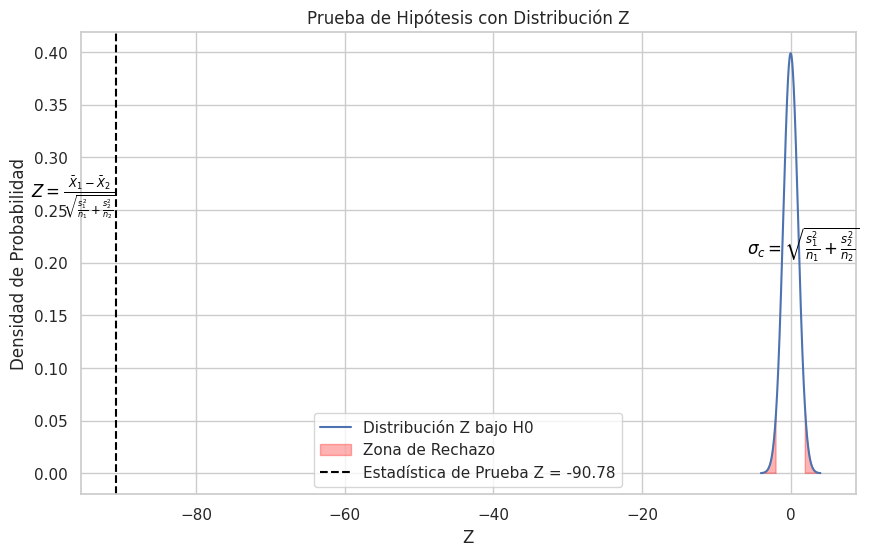

In [85]:

from scipy.stats import kstest, norm, ttest_ind


# Mostrar las columnas disponibles en el DataFrame
print("Columnas disponibles en el DataFrame:")
print(df.columns)

# Verificar el conteo de datos en las columnas 'Qo' y 'Qw'
print("\nConteo de datos en las columnas 'Qo' y 'Qw':")
print(df[['Qo', 'Qw']].notna().sum())

# Filtrar los datos para asegurarse de que hay suficientes datos en ambas columnas
df_filtered = df[['Qo', 'Qw']].dropna()

# Dividir los datos en dos grupos basados en las columnas 'Qo' y 'Qw'
group_qo = df_filtered['Qo']
group_qw = df_filtered['Qw']

# Verificar tamaños de muestra
n_qo = len(group_qo)
n_qw = len(group_qw)

print(f"Tamaño de muestra de Qo: {n_qo}")
print(f"Tamaño de muestra de Qw: {n_qw}")

if n_qo < 30 or n_qw < 30:
    print("Advertencia: una de las columnas tiene menos de 30 registros, considere usar la prueba de Shapiro-Wilk en su lugar.")

# Test de normalidad (Kolmogorov-Smirnov)
ks_qo = kstest(group_qo, 'norm', args=(group_qo.mean(), group_qo.std()))
ks_qw = kstest(group_qw, 'norm', args=(group_qw.mean(), group_qw.std()))

print(f'Prueba de Kolmogorov-Smirnov para Qo: estadístico={ks_qo[0]:.4f}, p-valor={ks_qo[1]:.4f}')
print(f'Prueba de Kolmogorov-Smirnov para Qw: estadístico={ks_qw[0]:.4f}, p-valor={ks_qw[1]:.4f}')

alpha = 0.05
if ks_qo[1] < alpha:
    print("La distribución de Qo no es normal.")
else:
    print("La distribución de Qo es normal.")

if ks_qw[1] < alpha:
    print("La distribución de Qw no es normal.")
else:
    print("La distribución de Qw es normal.")

# Realizar la prueba t usando scipy.stats
t_stat, p_value = ttest_ind(group_qo, group_qw)

# Mostrar resultados de la prueba t
print(f'Estadística t: {t_stat:.2f}')
print(f'Valor p: {p_value:.4f}')

# Visualización de la distribución Z
# Definición de la distribución Z bajo H0 (media poblacional igual)
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)

# Cálculo de Z y desviación estándar combinada
Z = (group_qo.mean() - group_qw.mean()) / np.sqrt(group_qo.var(ddof=1)/n_qo + group_qw.var(ddof=1)/n_qw)
sigma_c = np.sqrt(group_qo.var(ddof=1)/n_qo + group_qw.var(ddof=1)/n_qw)

# Zona de aceptación (nivel de significancia alpha = 0.05)
z_critical = norm.ppf(0.975)  # Z crítico para alpha/2 = 0.025 (dos colas)
z_rechazo_inf = -z_critical
z_rechazo_sup = z_critical

# Visualización
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribución Z bajo H0')
plt.fill_between(x, y, where=(x >= z_rechazo_sup) | (x <= z_rechazo_inf), color='red', alpha=0.3, label='Zona de Rechazo')
plt.axvline(Z, color='black', linestyle='--', label=f'Estadística de Prueba Z = {Z:.2f}')

# Etiquetas y ecuaciones
Z_formula = r'$Z = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$'
sigma_c_formula = r'$\sigma_c = \sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}$'
plt.text(Z, max(y)*0.6, Z_formula, rotation=0, va='bottom', ha='right', fontsize=12, color='black')
plt.text(z_rechazo_sup - 0.2, max(y)*0.5, sigma_c_formula, va='bottom', ha='center', fontsize=12, color='black')

plt.title('Prueba de Hipótesis con Distribución Z')
plt.xlabel('Z')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()


Los resultados indican que las tasas de producción de petróleo (`Qo`) y de agua (`Qw`) en los pozos analizados no siguen una distribución normal. La prueba t muestra una diferencia significativa entre estas dos variables, con un estadístico Z de -90.78, muy lejos de la zona de aceptación. Esto sugiere que hay una gran variabilidad en la producción de petróleo y agua, lo cual podría deberse a diferentes condiciones geológicas o de operación en los pozos. En términos prácticos, esto significa que algunos pozos podrían estar extrayendo más petróleo que otros, o enfrentando desafíos únicos que afectan la consistencia de la producción, requiriendo posiblemente ajustes en las técnicas de extracción o en la gestión de los pozos para optimizar la eficiencia[7].

#Test de homogeneidad de varianza

In [86]:

from scipy.stats import levene

# Mostrar las columnas disponibles en el DataFrame
print("Columnas disponibles en el DataFrame:")
print(df.columns)

# Verificar el conteo de datos en las columnas 'Qo' y 'Qw'
print("\nConteo de datos en las columnas 'Qo' y 'Qw':")
print(df[['Qo', 'Qw']].notna().sum())

# Filtrar los datos para asegurarse de que hay suficientes datos en ambas columnas
df_filtered = df[['Qo', 'Qw']].dropna()

# Dividir los datos en dos grupos basados en las columnas 'Qo' y 'Qw'
group_qo = df_filtered['Qo']
group_qw = df_filtered['Qw']

# Verificar tamaños de muestra
n_qo = len(group_qo)
n_qw = len(group_qw)

print(f"Tamaño de muestra de Qo: {n_qo}")
print(f"Tamaño de muestra de Qw: {n_qw}")

# Test de homogeneidad de varianza (Levene)
levene_test = levene(group_qo, group_qw)
print(f'Prueba de Levene: estadístico={levene_test[0]:.4f}, p-valor={levene_test[1]:.4f}')

alpha = 0.05
if levene_test[1] < alpha:
    print("Las varianzas de Qo y Qw no son homogéneas.")
else:
    print("Las varianzas de Qo y Qw son homogéneas.")


Columnas disponibles en el DataFrame:
Index(['Year', 'Month', 'wellAPI', 'Wellname', 'BHP', 'Qo', 'Qw', 'Qg',
       'CompL', 'FlowDays', 'Type', 'TD', 'reservoir', 'long', 'lat'],
      dtype='object')

Conteo de datos en las columnas 'Qo' y 'Qw':
Qo    3220
Qw    3220
dtype: int64
Tamaño de muestra de Qo: 3220
Tamaño de muestra de Qw: 3220
Prueba de Levene: estadístico=3500.0166, p-valor=0.0000
Las varianzas de Qo y Qw no son homogéneas.


Los resultados de la prueba  muestran que los caudales de petróleo (Qo) y agua (Qw) en el pozo no cambian de la misma manera, con una estadística de 3500,0166 y un valor p de 0,0000. Esto significa que existen grandes variaciones en la producción de petróleo y agua de un pozo a otro. En pocas palabras, algunos pozos producen significativamente más petróleo que otros y otros bombean más agua. Esta diferencia puede deberse a una serie de factores, como las condiciones del campo, la tecnología utilizada y los métodos de trabajo. Esta información es importante para ajustar las estrategias de gestión y optimizar la producción de petróleo de cada pozo, asegurando el máximo uso de los recursos disponibles [8].

Columnas disponibles en el DataFrame:
Index(['Year', 'Month', 'wellAPI', 'Wellname', 'BHP', 'Qo', 'Qw', 'Qg',
       'CompL', 'FlowDays', 'Type', 'TD', 'reservoir', 'long', 'lat'],
      dtype='object')


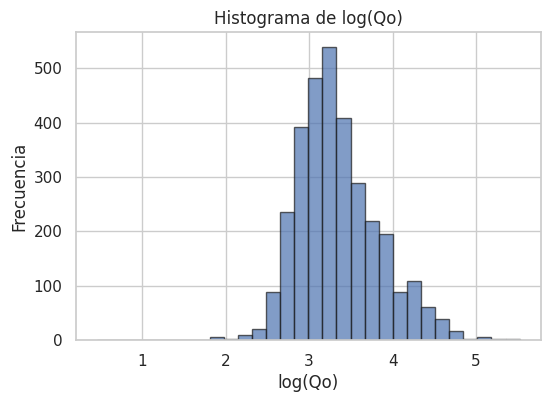

In [87]:
# Mostrar las columnas disponibles en el DataFrame
print("Columnas disponibles en el DataFrame:")
print(df.columns)

# Aplicar la transformación logarítmica a la columna 'Qo'
df['log_Qo'] = np.log(df['Qo'] + 1)  # Se suma 1 para evitar log(0)

# Histograma de la variable transformada
plt.figure(figsize=(6, 4))
plt.hist(df['log_Qo'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histograma de log(Qo)')
plt.xlabel('log(Qo)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


El gráfico logarítmico de la producción de petróleo (log(Qo)) muestra que la mayoría de los pozos tienen tasas de producción concentradas alrededor de un valor central cuando usamos una escala logarítmica. Esto puede significar que la producción de petróleo de la mayoría de los pozos es bastante estable, aunque hay algunos pozos que producen más o menos que la mayoría. Esta información es útil para determinar qué pozos están funcionando bien y cuáles pueden necesitar mejoras o ajustes para mejorar el rendimiento [6].

In [88]:
# Filtrar los datos para asegurarse de que hay suficientes datos en ambas columnas
df_filtered = df[['Qo', 'Qw']].dropna()

# Dividir los datos en dos grupos basados en las columnas 'Qo' y 'Qw'
group_qo = df_filtered['Qo']
group_qw = df_filtered['Qw']

# Calcular las medias para cada grupo
mean_qo = group_qo.mean()
mean_qw = group_qw.mean()

# Realizar la prueba t
t_stat, p_value = ttest_ind(group_qo, group_qw)

# Resultados
print(f'Media de Qo: {mean_qo:.2f}')
print(f'Media de Qw: {mean_qw:.2f}')
print(f'Valor t: {t_stat:.4f}')
print(f'Valor p: {p_value:.4f}')

# Verificación de hipótesis de los resultados
alpha = 0.05
if p_value < alpha:
    print('Se rechaza la hipótesis nula: Hay diferencia significativa entre las medias.')
else:
    print('No se rechaza la hipótesis nula: No hay diferencia significativa entre las medias.')


Media de Qo: 31.56
Media de Qw: 631.74
Valor t: -90.7841
Valor p: 0.0000
Se rechaza la hipótesis nula: Hay diferencia significativa entre las medias.


Al analizar estos datos resultantes podemos concluir que existe una diferencia significativa entre las dos cifras  de los datos de producción de petróleo (Qo) y agua (Qw) de los pozos. Lo que puede traducirse en que el rendimiento medio de petróleo es de 31,56 y el rendimiento de agua es mucho mayor con un promedio de 631,74. La prueba T nos da un valor t de -90,7841 y un valor p de 0,0000, lo que significa que la diferencia entre estas dos medias no se debe simplemente al azar.
En pocas palabras, esto nos dice que la cantidad de agua extraída supera con creces la cantidad de petróleo crudo en los pozos analizados. Este hallazgo es importante porque muestra que debemos analizar los factores que contribuyen a la creación de tanta agua. Algunos pozos pueden estar operando en condiciones subóptimas o puede haber problemas con la tecnología de producción utilizad [8].

## **Analisis de Varianza (ANOVA)**

### **Una via**

In [91]:

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Mostrar las columnas disponibles en el DataFrame
print("Columnas disponibles en el DataFrame:")
print(df.columns)

# Ajustar el modelo ANOVA
model = ols('Qo ~ C(reservoir)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Resultados
print("Resultados del ANOVA para Qo y reservoir:")
print(anova_table)

# Verificación de hipótesis de los resultados
alpha = 0.05
if anova_table['PR(>F)'][0] < alpha:
    print("Hay diferencias significativas entre los grupos de reservoir para la variable Qo.")
else:
    print("No hay diferencias significativas entre los grupos de reservoir para la variable Qo.")


Columnas disponibles en el DataFrame:
Index(['Year', 'Month', 'wellAPI', 'Wellname', 'BHP', 'Qo', 'Qw', 'Qg',
       'CompL', 'FlowDays', 'Type', 'TD', 'reservoir', 'long', 'lat',
       'log_Qo'],
      dtype='object')
Resultados del ANOVA para Qo y reservoir:
                    sum_sq      df        F        PR(>F)
C(reservoir)  1.064861e+05     3.0  92.9125  1.152705e-57
Residual      1.228609e+06  3216.0      NaN           NaN
Hay diferencias significativas entre los grupos de reservoir para la variable Qo.


Al analizar los datos de producción de petróleo (Qo) para diferentes yacimientos, utilicé el análisis de varianza para ver si había diferencias significativas entre estos grupos. Los resultados muestran un valor p extremadamente bajo (1.152705e-57), lo que indica que las diferencias entre los grupos de reservorios son significativas [8]. Esto me dice que la cantidad de petróleo que producimos varía mucho dependiendo de la formación con la que estemos trabajando. Este hallazgo es importante porque significa que algunos reservorios son mucho más productivos que otros.En el campo petrolero estos resultados ayudan a centrar mis recursos y esfuerzos en las áreas más productivas y a investigar más a fondo las áreas de bajo rendimiento para comprender las causas y encontrar formas de optimizar la producción. Este tipo de análisis nos permite tomar decisiones más informadas y estratégicas para mejorar la eficiencia y maximizar la producción de petróleo [6].

# **Transformación de los datos**

In [94]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Mostrar las columnas disponibles en el DataFrame
print("Columnas disponibles en el DataFrame:")
print(df.columns)

# Crear copias del DataFrame para estandarización y normalización
df_standardized = df.copy()
df_normalized = df.copy()

# Seleccionar las columnas numéricas para la transformación
numeric_cols = ['Qo', 'Qw']

# Estandarización
scaler_standard = StandardScaler()
df_standardized[numeric_cols] = scaler_standard.fit_transform(df_standardized[numeric_cols])

# Normalización
scaler_normal = MinMaxScaler()
df_normalized[numeric_cols] = scaler_normal.fit_transform(df_normalized[numeric_cols])

# Mostrar los resultados
print("\nData estandarizada (primeras filas):")
print(df_standardized.head())

print("\nData normalizada (primeras filas):")
print(df_normalized.head())


Columnas disponibles en el DataFrame:
Index(['Year', 'Month', 'wellAPI', 'Wellname', 'BHP', 'Qo', 'Qw', 'Qg',
       'CompL', 'FlowDays', 'Type', 'TD', 'reservoir', 'long', 'lat',
       'log_Qo'],
      dtype='object')

Data estandarizada (primeras filas):
   Year  Month     wellAPI Wellname  BHP        Qo        Qw        Qg  \
0  2005      1  2ECFC837AC  Well025   15  0.085448 -0.715210  13.85077   
1  2005      2  2ECFC837AC  Well025   15 -0.212034 -0.675056  14.23028   
2  2005      3  2ECFC837AC  Well025   15 -0.422533 -0.656199  13.93621   
3  2005      8  2ECFC837AC  Well025   15 -0.305851 -0.630804  13.87802   
4  2005      9  2ECFC837AC  Well025   15 -0.314520 -0.664007  14.12587   

      CompL  FlowDays      Type        TD reservoir       long        lat  \
0  60.69554  29.99997  Producer  7509.843    Bisque  21.204409 -33.169318   
1  60.69554  28.00000  Producer  7509.843    Bisque  21.204409 -33.169318   
2  60.69554  31.00000  Producer  7509.843    Bisque  21.204409 -33

In [95]:

from sklearn.preprocessing import StandardScaler

# Crear una copia del DataFrame para la estandarización
df_standardized = df.copy()

# Seleccionar las columnas numéricas para la estandarización
numeric_columns = df_standardized.select_dtypes(include=['int64', 'float64']).columns

# Crear el objeto StandardScaler
scaler = StandardScaler()

# Estandarizar las variables numéricas
df_standardized[numeric_columns] = scaler.fit_transform(df_standardized[numeric_columns])

print("Data estandarizada:")
print(df_standardized.head())


Data estandarizada:
       Year     Month     wellAPI Wellname  BHP        Qo        Qw        Qg  \
0 -1.671992 -1.572763  2ECFC837AC  Well025  0.0  0.085448 -0.715210 -0.024146   
1 -1.671992 -1.284675  2ECFC837AC  Well025  0.0 -0.212034 -0.675056  0.022518   
2 -1.671992 -0.996588  2ECFC837AC  Well025  0.0 -0.422533 -0.656199 -0.013641   
3 -1.671992  0.443852  2ECFC837AC  Well025  0.0 -0.305851 -0.630804 -0.020796   
4 -1.671992  0.731940  2ECFC837AC  Well025  0.0 -0.314520 -0.664007  0.009680   

     CompL  FlowDays      Type        TD reservoir      long       lat  \
0 -0.50951  0.188433  Producer -0.714456    Bisque -0.909621  0.779375   
1 -0.50951 -0.726077  Producer -0.714456    Bisque -0.909621  0.779375   
2 -0.50951  0.645709  Producer -0.714456    Bisque -0.909621  0.779375   
3 -0.50951  0.188433  Producer -0.714456    Bisque -0.909621  0.779375   
4 -0.50951  0.188447  Producer -0.714456    Bisque -0.909621  0.779375   

     log_Qo  
0  0.378737  
1 -0.014330  
2 -0.3

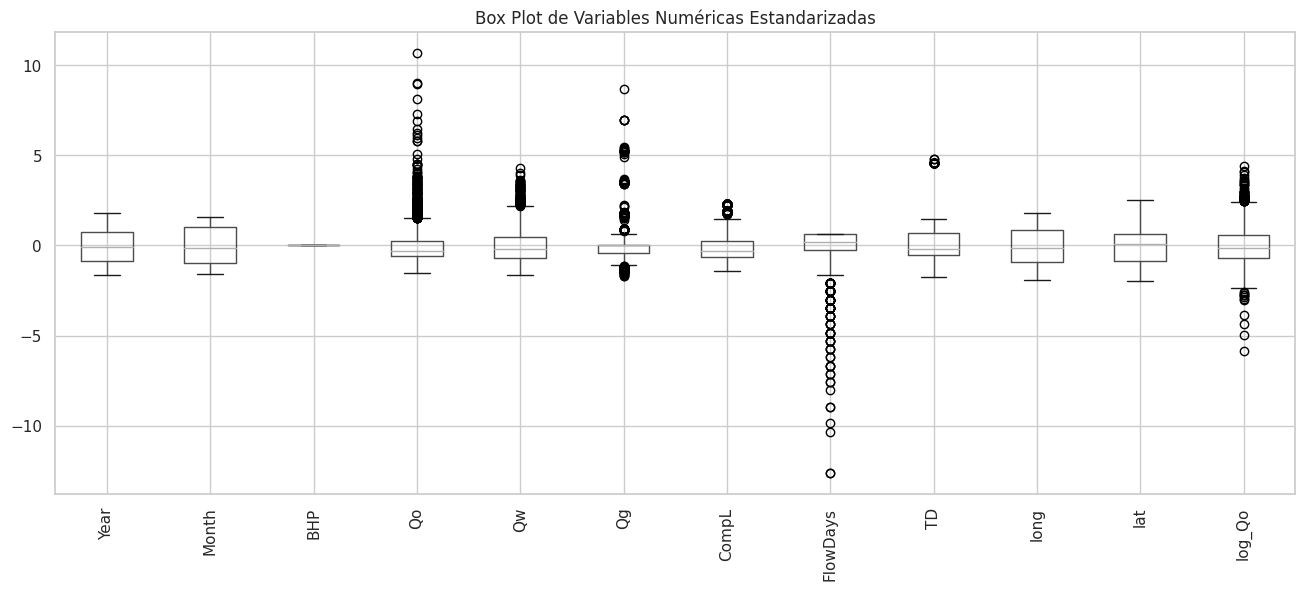

In [96]:

from sklearn.preprocessing import StandardScaler

# Crear una copia del DataFrame para la estandarización
df_standardized = df.copy()

# Seleccionar las columnas numéricas para la estandarización
numeric_columns = df_standardized.select_dtypes(include=['int64', 'float64']).columns

# Crear el objeto StandardScaler
scaler = StandardScaler()

# Estandarizar las variables numéricas
df_standardized[numeric_columns] = scaler.fit_transform(df_standardized[numeric_columns])

# Seleccionar columnas numéricas estandarizadas
var_num = df_standardized.select_dtypes(include=['number']).columns

# Generar el Box Plot de las variables numéricas estandarizadas
plt.figure(figsize=(16, 6))
df_standardized = pd.DataFrame(df_standardized, columns=df.columns)  # Asegurar que los nombres de columnas se mantengan
df_standardized[var_num].boxplot()
plt.title('Box Plot de Variables Numéricas Estandarizadas')
plt.xticks(rotation=90)
plt.show()


Al observar el Box Plot de las variables numéricas estandarizadas de nuestro dataset, noto varias cosas interesantes. Primero, las variables `Qo` (producción de petróleo), `Qw` (producción de agua) y `Qg` (producción de gas) tienen muchos puntos que se salen del rango normal, lo que significa que hay pozos que producen mucho más o mucho menos que la mayoría. Esto podría deberse a diferencias en las características geológicas, las técnicas de extracción utilizadas o las condiciones de operación en cada pozo [7].

En particular, `FlowDays` también muestra muchos valores atípicos, lo que sugiere que hay variaciones significativas en los días de operación de los pozos. Esto podría ser una señal de inconsistencias en las operaciones o de interrupciones en la producción.

La variable `BHP` (presión en el fondo del pozo) parece ser bastante constante, lo que indica que las condiciones de presión en los pozos son similares. Sin embargo, las diferencias en otras variables como `lat` y `long` reflejan la diversidad geográfica de los pozos analizados [8].


In [97]:

from sklearn.preprocessing import MinMaxScaler


# Crear una copia del DataFrame para la normalización
df_normalized = df.copy()

# Seleccionar las columnas numéricas para la normalización
numeric_columns = df_normalized.select_dtypes(include=['int64', 'float64']).columns

# Crear el objeto MinMaxScaler
min_max_scaler = MinMaxScaler()

# Normalizar las variables numéricas
df_normalized[numeric_columns] = min_max_scaler.fit_transform(df_normalized[numeric_columns])

print("Data normalizada:")
print(df_normalized.head())


Data normalizada:
   Year     Month     wellAPI Wellname  BHP        Qo        Qw        Qg  \
0   0.0  0.000000  2ECFC837AC  Well025  0.0  0.131717  0.160510  0.160143   
1   0.0  0.090909  2ECFC837AC  Well025  0.0  0.107333  0.167274  0.164638   
2   0.0  0.181818  2ECFC837AC  Well025  0.0  0.090079  0.170450  0.161155   
3   0.0  0.636364  2ECFC837AC  Well025  0.0  0.099643  0.174728  0.160466   
4   0.0  0.727273  2ECFC837AC  Well025  0.0  0.098933  0.169135  0.163401   

      CompL  FlowDays      Type        TD reservoir      long       lat  \
0  0.247934  0.965516  Producer  0.160135    Bisque  0.278853  0.612522   
1  0.247934  0.896552  Producer  0.160135    Bisque  0.278853  0.612522   
2  0.247934  1.000000  Producer  0.160135    Bisque  0.278853  0.612522   
3  0.247934  0.965516  Producer  0.160135    Bisque  0.278853  0.612522   
4  0.247934  0.965517  Producer  0.160135    Bisque  0.278853  0.612522   

     log_Qo  
0  0.607666  
1  0.569288  
2  0.536779  
3  0.555455 

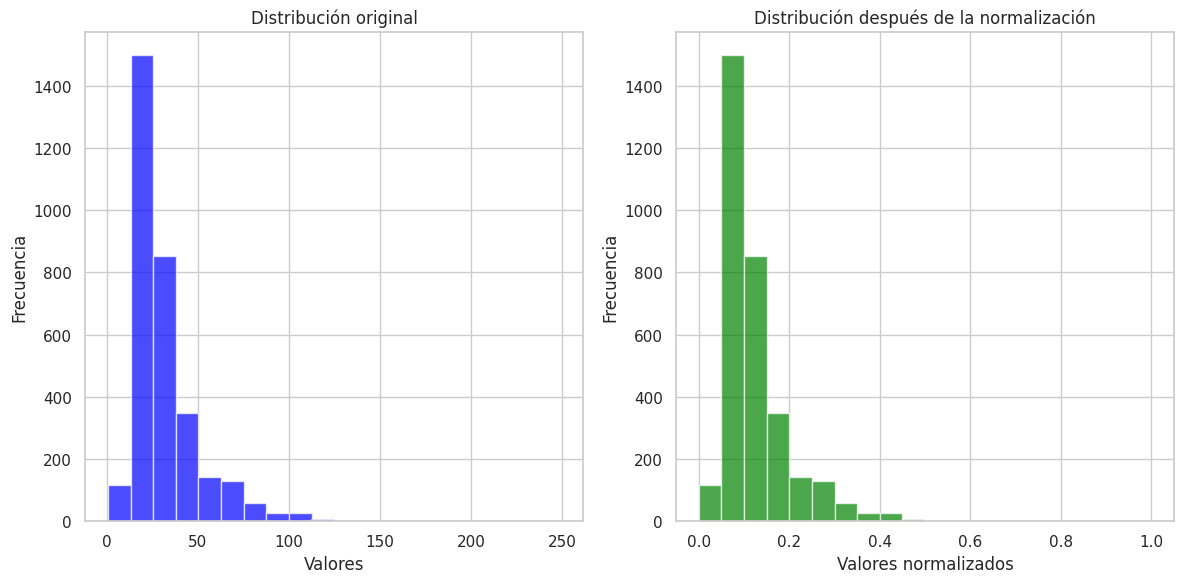

In [101]:

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


# Crear una copia del DataFrame para la normalización
df_normalized = df.copy()

# Seleccionar las columnas numéricas para la normalización
numeric_columns = df_normalized.select_dtypes(include=['int64', 'float64']).columns

# Crear el objeto MinMaxScaler
min_max_scaler = MinMaxScaler()

# Normalizar las variables numéricas
df_normalized[numeric_columns] = min_max_scaler.fit_transform(df_normalized[numeric_columns])

# Columna para visualizar
column_to_visualize = 'Qo'

# Subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Distribución original
axes[0].hist(df[column_to_visualize], bins=20, color='blue', alpha=0.7)
axes[0].set_title('Distribución original')
axes[0].set_xlabel('Valores')
axes[0].set_ylabel('Frecuencia')

# Convertir df_normalized a DataFrame para facilitar el acceso a la columna
df_normalized = pd.DataFrame(df_normalized, columns=df.columns)

# Distribución después de la normalización
axes[1].hist(df_normalized[column_to_visualize], bins=20, color='green', alpha=0.7)
axes[1].set_title('Distribución después de la normalización')
axes[1].set_xlabel('Valores normalizados')
axes[1].set_ylabel('Frecuencia')

# Ajuste
plt.tight_layout()

plt.show()



Al observar los gráficos de la variable Qo (producción de petróleo) antes y después de la normalización, se nota que la mayoría de los pozos tienen producciones bajas, concentradas por debajo de 50 unidades en el gráfico original. La distribución está sesgada hacia la izquierda, indicando muchos pozos con baja producción y unos pocos con producciones mucho más altas [8].

Después de la normalización (gráfico de la derecha), los valores se ajustan entre 0 y 1, manteniendo la forma general pero permitiendo una comparación más sencilla con otras variables normalizadas.

# **Selección de variables**

### **Matriz de Correlaciones**

Matriz de correlación:
              Year     Month        Qo        Qw        Qg     CompL  \
Year      1.000000 -0.074001 -0.409740 -0.011127 -0.088396 -0.020489   
Month    -0.074001  1.000000  0.003047 -0.002597  0.036478  0.001009   
Qo       -0.409740  0.003047  1.000000  0.224780  0.554391  0.212991   
Qw       -0.011127 -0.002597  0.224780  1.000000  0.205557  0.426955   
Qg       -0.088396  0.036478  0.554391  0.205557  1.000000  0.380970   
CompL    -0.020489  0.001009  0.212991  0.426955  0.380970  1.000000   
FlowDays -0.097428  0.090924  0.103089  0.008039  0.075495  0.007427   
TD       -0.008864  0.000093  0.009054 -0.035534 -0.162977 -0.239089   
long     -0.065187 -0.021085  0.196980 -0.213591 -0.042801 -0.172101   
lat       0.058434  0.013348 -0.081447 -0.033062  0.061281  0.068610   

          FlowDays        TD      long       lat  
Year     -0.097428 -0.008864 -0.065187  0.058434  
Month     0.090924  0.000093 -0.021085  0.013348  
Qo        0.103089  0.009054  0

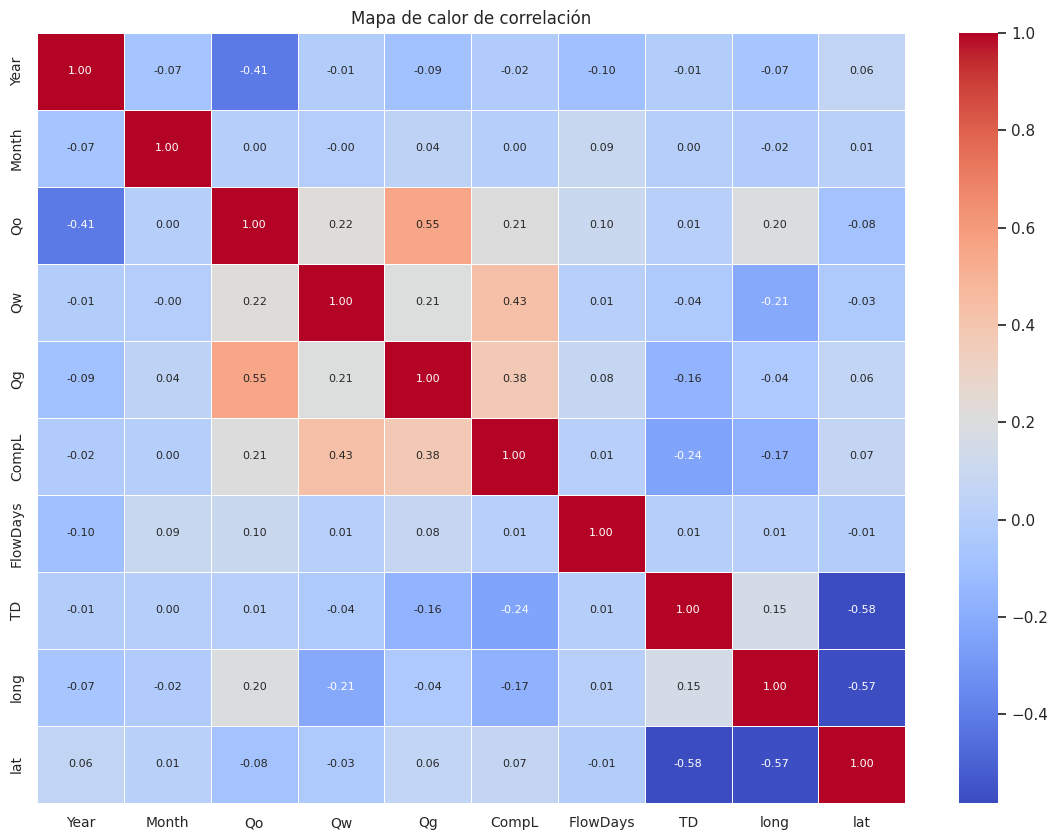

In [111]:
# Eliminar columnas con poca o ninguna variabilidad
df_cleaned = df.drop(columns=['BHP'])

# Calcular las columnas numéricas después de limpiar el DataFrame
numeric_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns # Recalculate numeric_columns after dropping 'BHP'

# Calcular la matriz de correlación
correlation_matrix = df_cleaned[numeric_columns].corr()

# Mostrar la matriz de correlación
print("Matriz de correlación:")
print(correlation_matrix)

# Generar el mapa de calor de la matriz de correlación
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.title('Mapa de calor de correlación')
plt.show()

Los colores de las celdas varían del azul (correlación negativa) al rojo (correlación positiva), con los valores de correlación escritos en cada celda.

- Año (Year): Hay una correlación negativa con la producción de petróleo (Qo) (-0.41), lo que me dice que la producción ha disminuido con el tiempo. También hay una leve disminución en los días de flujo (FlowDays) (-0.10).

- Mes (Month): No veo correlaciones fuertes, sugiriendo que la producción no varía significativamente de un mes a otro.

- Producción de petróleo (Qo): Hay una correlación positiva moderada con la producción de gas (Qg) (0.55), indicando que cuando aumenta la producción de petróleo, también lo hace la producción de gas.

- Producción de agua (Qw): Está positivamente correlacionada con la longitud de la completación (CompL) (0.43), lo que sugiere que pozos con mayores longitudes de completación tienden a producir más agua.

- Producción de gas (Qg): Además de la correlación con Qo, hay una correlación positiva con CompL (0.38), lo que implica que una mayor longitud de completación también está asociada con una mayor producción de gas.

- Días de flujo (FlowDays): Las correlaciones son muy bajas con otras variables, lo que indica que el número de días de flujo no está fuertemente relacionado con otras medidas de producción.

- Temperatura del fondo del pozo (TD): Hay una correlación negativa con la latitud (-0.58) y la longitud (-0.57), sugiriendo que la ubicación geográfica afecta la temperatura en el fondo del pozo.

## **Analisis de Componentes Principales (ACP)**

In [113]:
from sklearn.decomposition import PCA

numeric_columns = df_normalized.select_dtypes(include=['int', 'float']).columns

# PCA para reducir la dimensionalidad
pca = PCA()  # podemos especificar el número de componentees, parametro: n_components
df_reducido = pca.fit_transform(df_normalized[numeric_columns])

#componentes principales
componentes_principales = pca.components_

# dataFrame para info de los componentes
info_componentes = pd.DataFrame(componentes_principales, columns=numeric_columns)

# tabla con información de los componentes (pesos)
info_componentes.head()

,Year,Month,BHP,Qo,Qw,Qg,CompL,FlowDays,TD,long,lat
0,-0.161915,-0.062541,5.551115e-17,0.024297,-0.176567,-0.061510,-0.422494,0.002956,0.210403,0.689264,-0.486270
1,-0.373098,0.924834,-5.551115e-17,0.043156,0.012684,0.027167,0.038065,0.029459,0.001226,0.011950,-0.016025
2,-0.791123,-0.350803,-2.775558e-17,0.140652,0.163979,0.092019,0.430996,0.014790,-0.039693,0.049576,-0.076897
3,-0.438796,-0.130452,0.000000e+00,-0.033650,-0.249532,-0.095203,-0.685520,0.005054,-0.040977,-0.336417,0.364911
4,-0.026295,-0.008753,2.463307e-16,-0.038922,0.317960,-0.063161,-0.126386,0.002021,0.570292,-0.540547,-0.509144


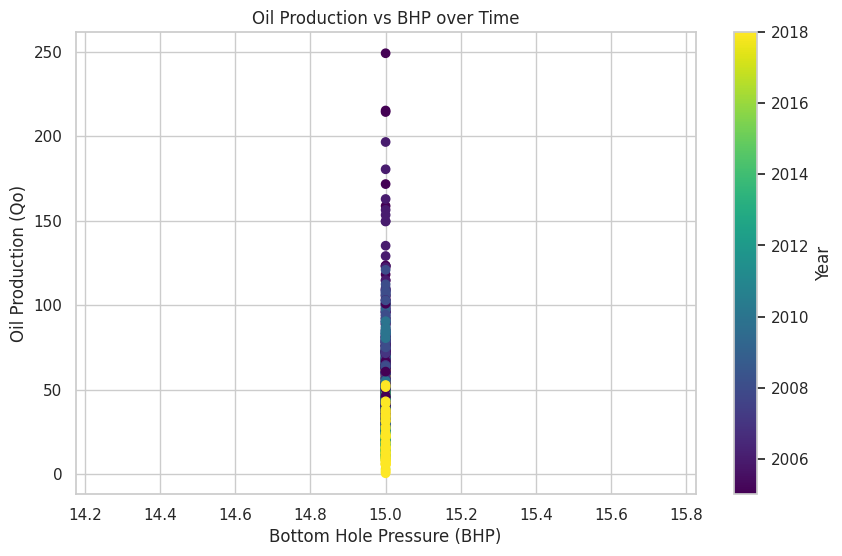

In [115]:
# @title Oil Production vs BHP over Time

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df['BHP'], df['Qo'], c=df['Year'], cmap='viridis')
plt.xlabel('Bottom Hole Pressure (BHP)')
plt.ylabel('Oil Production (Qo)')
plt.title('Oil Production vs BHP over Time')
_ = plt.colorbar(label='Year')

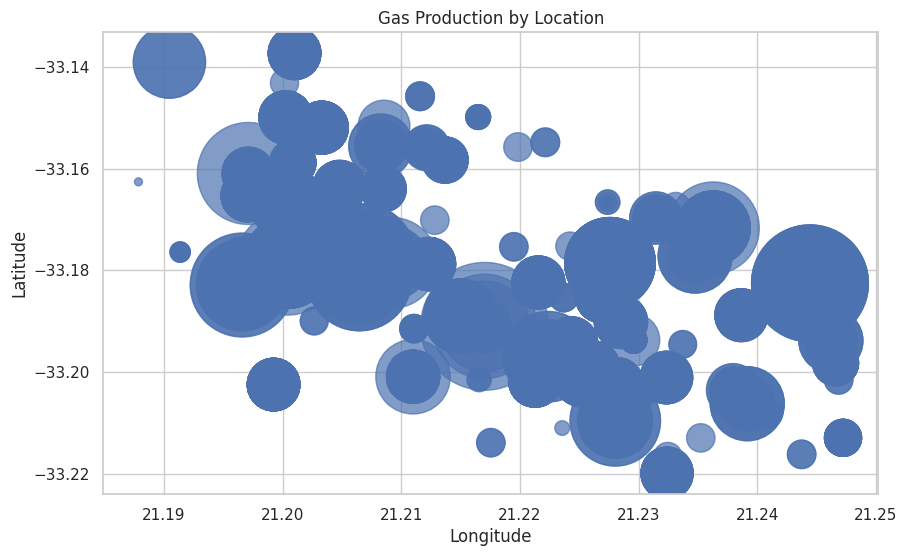

In [114]:
# @title Gas Production by Location

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['long'], df['lat'], s=df['Qg']*100, alpha=0.7)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
_ = plt.title('Gas Production by Location')

In [116]:
# variabilidad explicada
explained_variance_ratio = pca.explained_variance_ratio_[:10] # indicar cuantos PC

# variabilidad explicada por cada componente principal
for i, explained_variance in enumerate(explained_variance_ratio):
    print(f"Variabilidad explicada por el componente principal {i+1}: {explained_variance:.2%}")

Variabilidad explicada por el componente principal 1: 24.51%
Variabilidad explicada por el componente principal 2: 22.77%
Variabilidad explicada por el componente principal 3: 18.76%
Variabilidad explicada por el componente principal 4: 15.70%
Variabilidad explicada por el componente principal 5: 8.13%
Variabilidad explicada por el componente principal 6: 4.27%
Variabilidad explicada por el componente principal 7: 2.22%
Variabilidad explicada por el componente principal 8: 1.87%
Variabilidad explicada por el componente principal 9: 1.23%
Variabilidad explicada por el componente principal 10: 0.54%


In [117]:
# 1er componente principal
primer_componente = info_componentes.iloc[0]

# Ordenar la contribución del primer componente principal
variables_ordenadas = primer_componente.abs().sort_values(ascending=False)

print("Variables en el primer componente principal:")
print(variables_ordenadas.head(10))

Variables en el primer componente principal:
long        0.689264
lat         0.486270
CompL       0.422494
TD          0.210403
Qw          0.176567
Year        0.161915
Month       0.062541
Qg          0.061510
Qo          0.024297
FlowDays    0.002956
Name: 0, dtype: float64


In [118]:
import plotly.express as px

# para dos componentes principales
primeros_dos_componentes = info_componentes.iloc[:2]

# figura con Plotly Express
fig = px.scatter(primeros_dos_componentes.T, x=0, y=1, text=primeros_dos_componentes.T.index)

# personalizar el diseño y las etiquetas
fig.update_traces(marker=dict(size=12, color='blue'),
                  textfont=dict(size=8),
                  mode='markers+text')

fig.update_layout(title='Variables en los primeros dos componentes principales',
                  xaxis_title='Componente principal 1',
                  yaxis_title='Componente principal 2')

# Mostrar la figura
fig.show()

In [119]:
import plotly.express as px

primeros_tres_componentes = info_componentes.iloc[:3]

# transponer
primeros_tres_componentes_transpuesto = primeros_tres_componentes.T

# figura 3D
fig = px.scatter_3d(primeros_tres_componentes_transpuesto,
                    x=0, y=1, z=2,
                    text=primeros_tres_componentes_transpuesto.index)

# diseño y las etiquetas
fig.update_traces(marker=dict(size=5, color='blue'),
                  textfont=dict(size=10),
                  mode='markers+text')

fig.update_layout(title='Variables en los primeros tres componentes principales',
                  scene=dict(
                      xaxis_title='Componente principal 1',
                      yaxis_title='Componente principal 2',
                      zaxis_title='Componente principal 3'))

fig.show()

- Completación (CompL): Se encuentra separada del grupo principal de variables, indicando que la longitud de la completación tiene características distintivas que no están fuertemente correlacionadas con otras variables.
- Mes (Month): También se aparta del grupo principal, lo que sugiere que los cambios mensuales tienen una influencia única en la producción y no están altamente correlacionados con otras variables.
- Año (Year): Está alejado de la mayoría de las otras variables, indicando que hay una tendencia temporal a lo largo de los años que afecta de manera distinta la producción de petróleo.
- Variables centrales (Qo, Qw, Qg, FlowDays, TD, lat): Están agrupadas cerca del centro, indicando que estas variables están más interrelacionadas y comparten patrones similares de variabilidad.

En definitiva se destaca que la longitud de la completación (CompL) y el tiempo (año y mes) tienen un impacto significativo en la producción. Las variables como la producción de petróleo, gas, agua y los días de flujo están interrelacionadas, lo que sugiere que se influyen mutuamente. Los ingenieros pueden usar esta información para optimizar la producción enfocándose en las áreas del yacimiento que son más productivas y ajustando la longitud de completación para mejorar la extracción de recursos.


# Conclusión
Utilizando herramientas como Pandas, Numpy, Matplotlib, Seaborn, Scipy y Folium, examiné datos detallados de producción de petróleo y agua para aplicar inferencia estadística. Descubrí que los pozos que perdían mucha agua tardaban más en completarse, lo que afectaba negativamente la producción de petróleo. Esto resalta la importancia de la optimización de los puntos de interrupción para mejorar la eficiencia y la rentabilidad de las operaciones de exploración petrolera, destacando cómo la inferencia estadística ayuda a comprender mejor estas dinámicas complejas en esta área.

# Referencias Bibliográficas


1. Boschetti, A. y Massaron, L. (2018).Python Data Science Essentials: A Practitioner's Guide Covering Essential Data Science Principles, Tools, and Techniques. (pp. 64- 135) Packt Publishing, Limited.
2. So, A., Joseph, T. V., John, R. T., Worsley, A. y Asare, S. (2020). The data science workshop: A new, interactive approach to learning data science. (16-36) Packt Publishing, Limited.
3.Barros, W. Q., & Pires, A. P. (2021). Application of neural network to speed-up equilibrium calculations in compositional reservoir simulation. Artificial Intelligence in Geosciences. (pp.202–214). https://doi.org/10.1016/j.aiig.2022.03.004
4.Celia, M. A., Bachu, S., Nordbotten, J. M., & Bandilla, K. W. (2015). Status of CO2 storage in deep saline aquifers with emphasis on modeling approaches and practical simulations. Water Resources Research, 51, 6846–6892. https://doi.org/doi:10.1002/2015WR017609
5.Segura Flores J.E (2010). Trabajos de Reparación y Mantenimiento de
Pozos para los Activos de la Región Norte. Tesis de licenciatura no
publicada. Universidad Nacional Autónoma de México, Distrito Federal,
México.
6.Echeverría, F., & Sánchez, C. (2016). Optimización de tiempos en la perforación de pozos petroleros utilizando algoritmos genéticos. En Memorias del Congreso de Investigación y Desarrollo, Bogotá, Colombia.
7.Ledesma, F. (2015). Análisis de costos para la toma de decisiones en la industria petrolera (Trabajo de investigación, Universidad Nacional de Cuyo). Biblioteca digital UNCUYO.https://bdigital.uncu.edu.ar/objetos_digitales/7546/ledesma-facundo.pdf
8.Vivas Buitrago, C. D. (2021) Caracterización de pozos petroleros aprovechables para la producción de energía geotérmica. [Trabajo de grado, Fundación Universidad de América] Repositorio Institucional Lumieres. https://hdl.handle.net/20.500.11839/8398.




